# **Final pipeline showcase**


In [1]:
from scGmix import scgmix
import scanpy as sc

# **scGmix**


Having gone trhough all the steps of pipeline in detail in notebooks `preproccesing`,`dimreduction`,`clustering`,`visulization` we have automated the processes in each of them in a single intuitive pipeline called `scGMix` (single-cell-Mixture) available in `scGmix.py`.

The pipeline provides functionality for preprocessing the data, performing dimensionality reduction, and clustering the cells using Gaussian Mixture Models (GMMs). It work with data stored in an anndata object, which is a widely used data structure for scRNA-seq data. And is an attempt to bridge the tools `scanpy` provides for single-cell handling with the Gaussian mixture model capabilites of `sklearn`.


# **dataset 2.**


In [2]:
adata = sc.read_csv("datasets/dataset2.csv")

screeplot selected 4 principal components out of 100


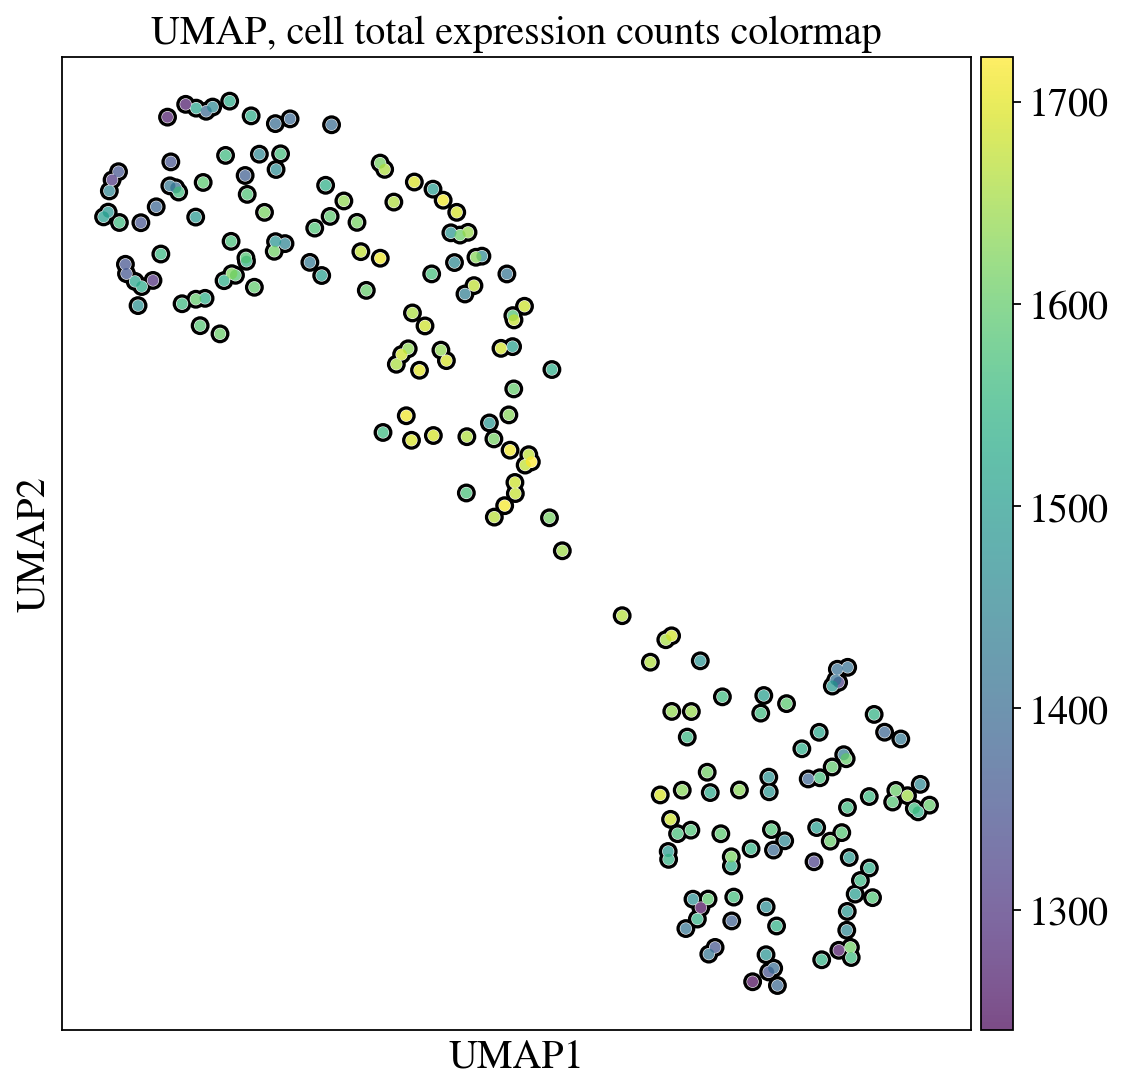

  0%|          | 0/100 [00:00<?, ?it/s]

Gaussian Mixture model with BIC = 1398.2355517014246
GaussianMixture(covariance_type='diag', max_iter=1000,
                means_init=array([[8.071672 , 1.281014 ],
       [1.6898149, 6.346886 ],
       [4.4874735, 5.0666986]], dtype=float32),
                n_components=3, random_state=30)


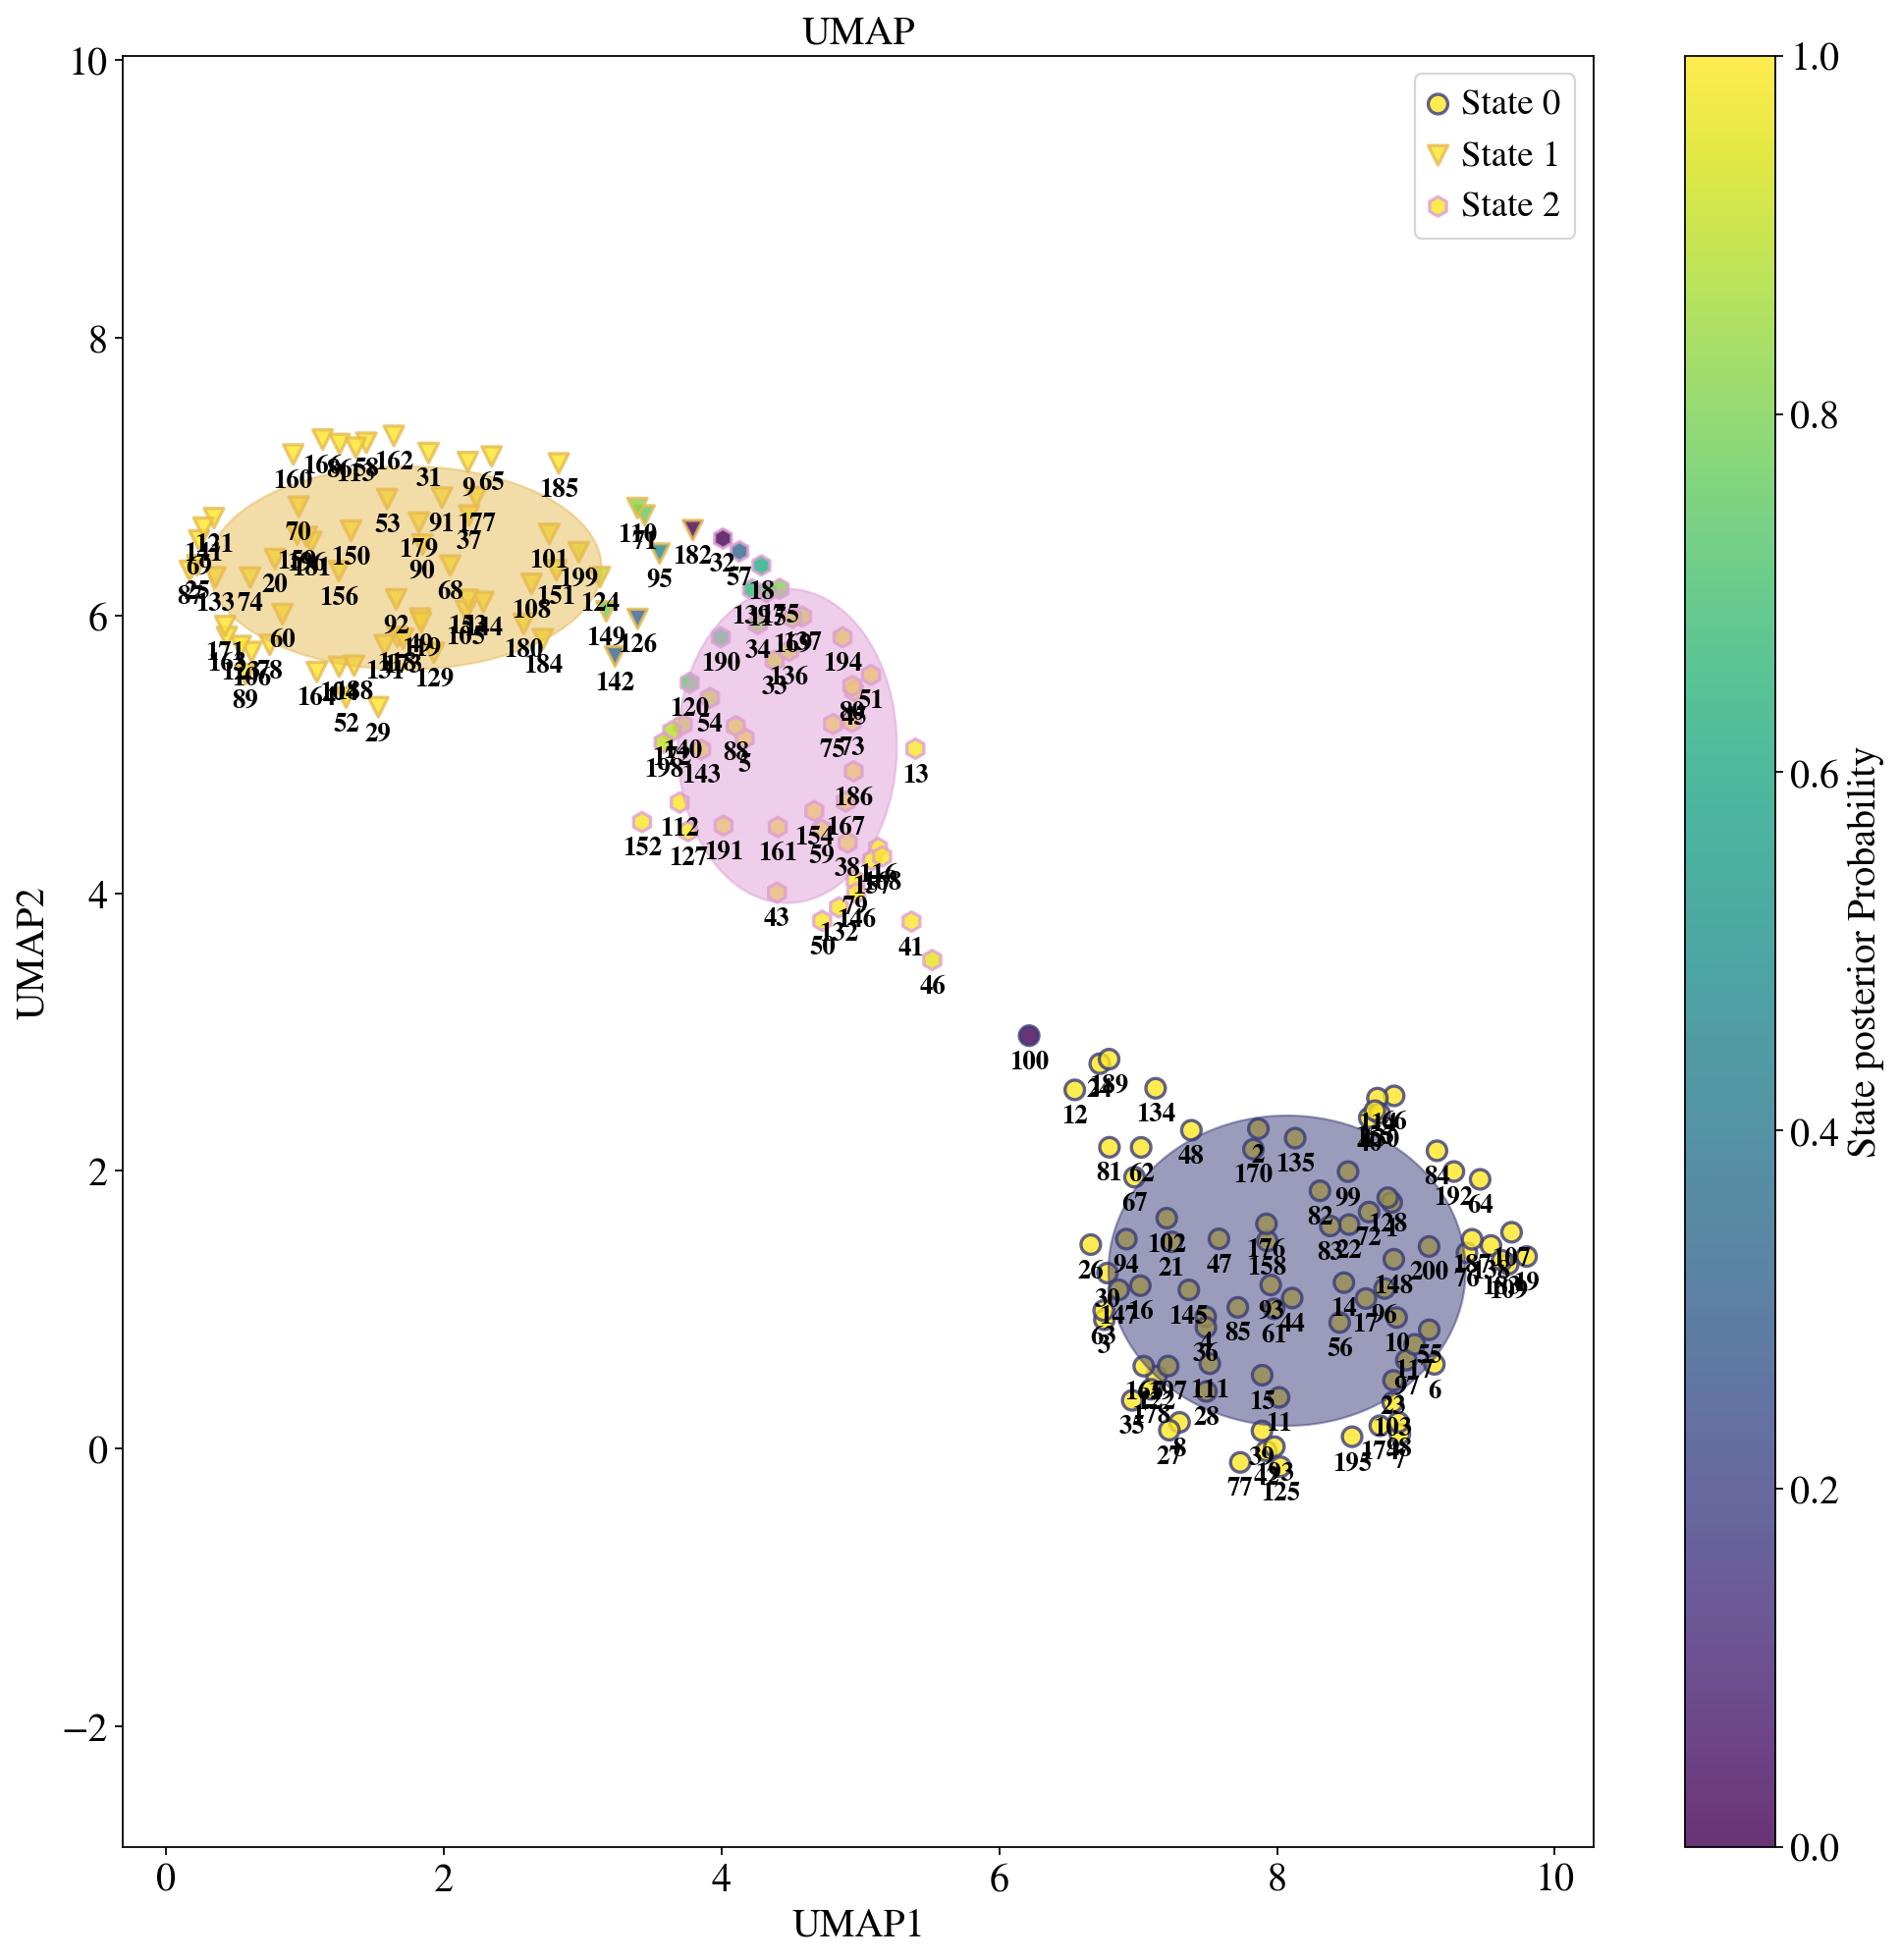

No handles with labels found to put in legend.


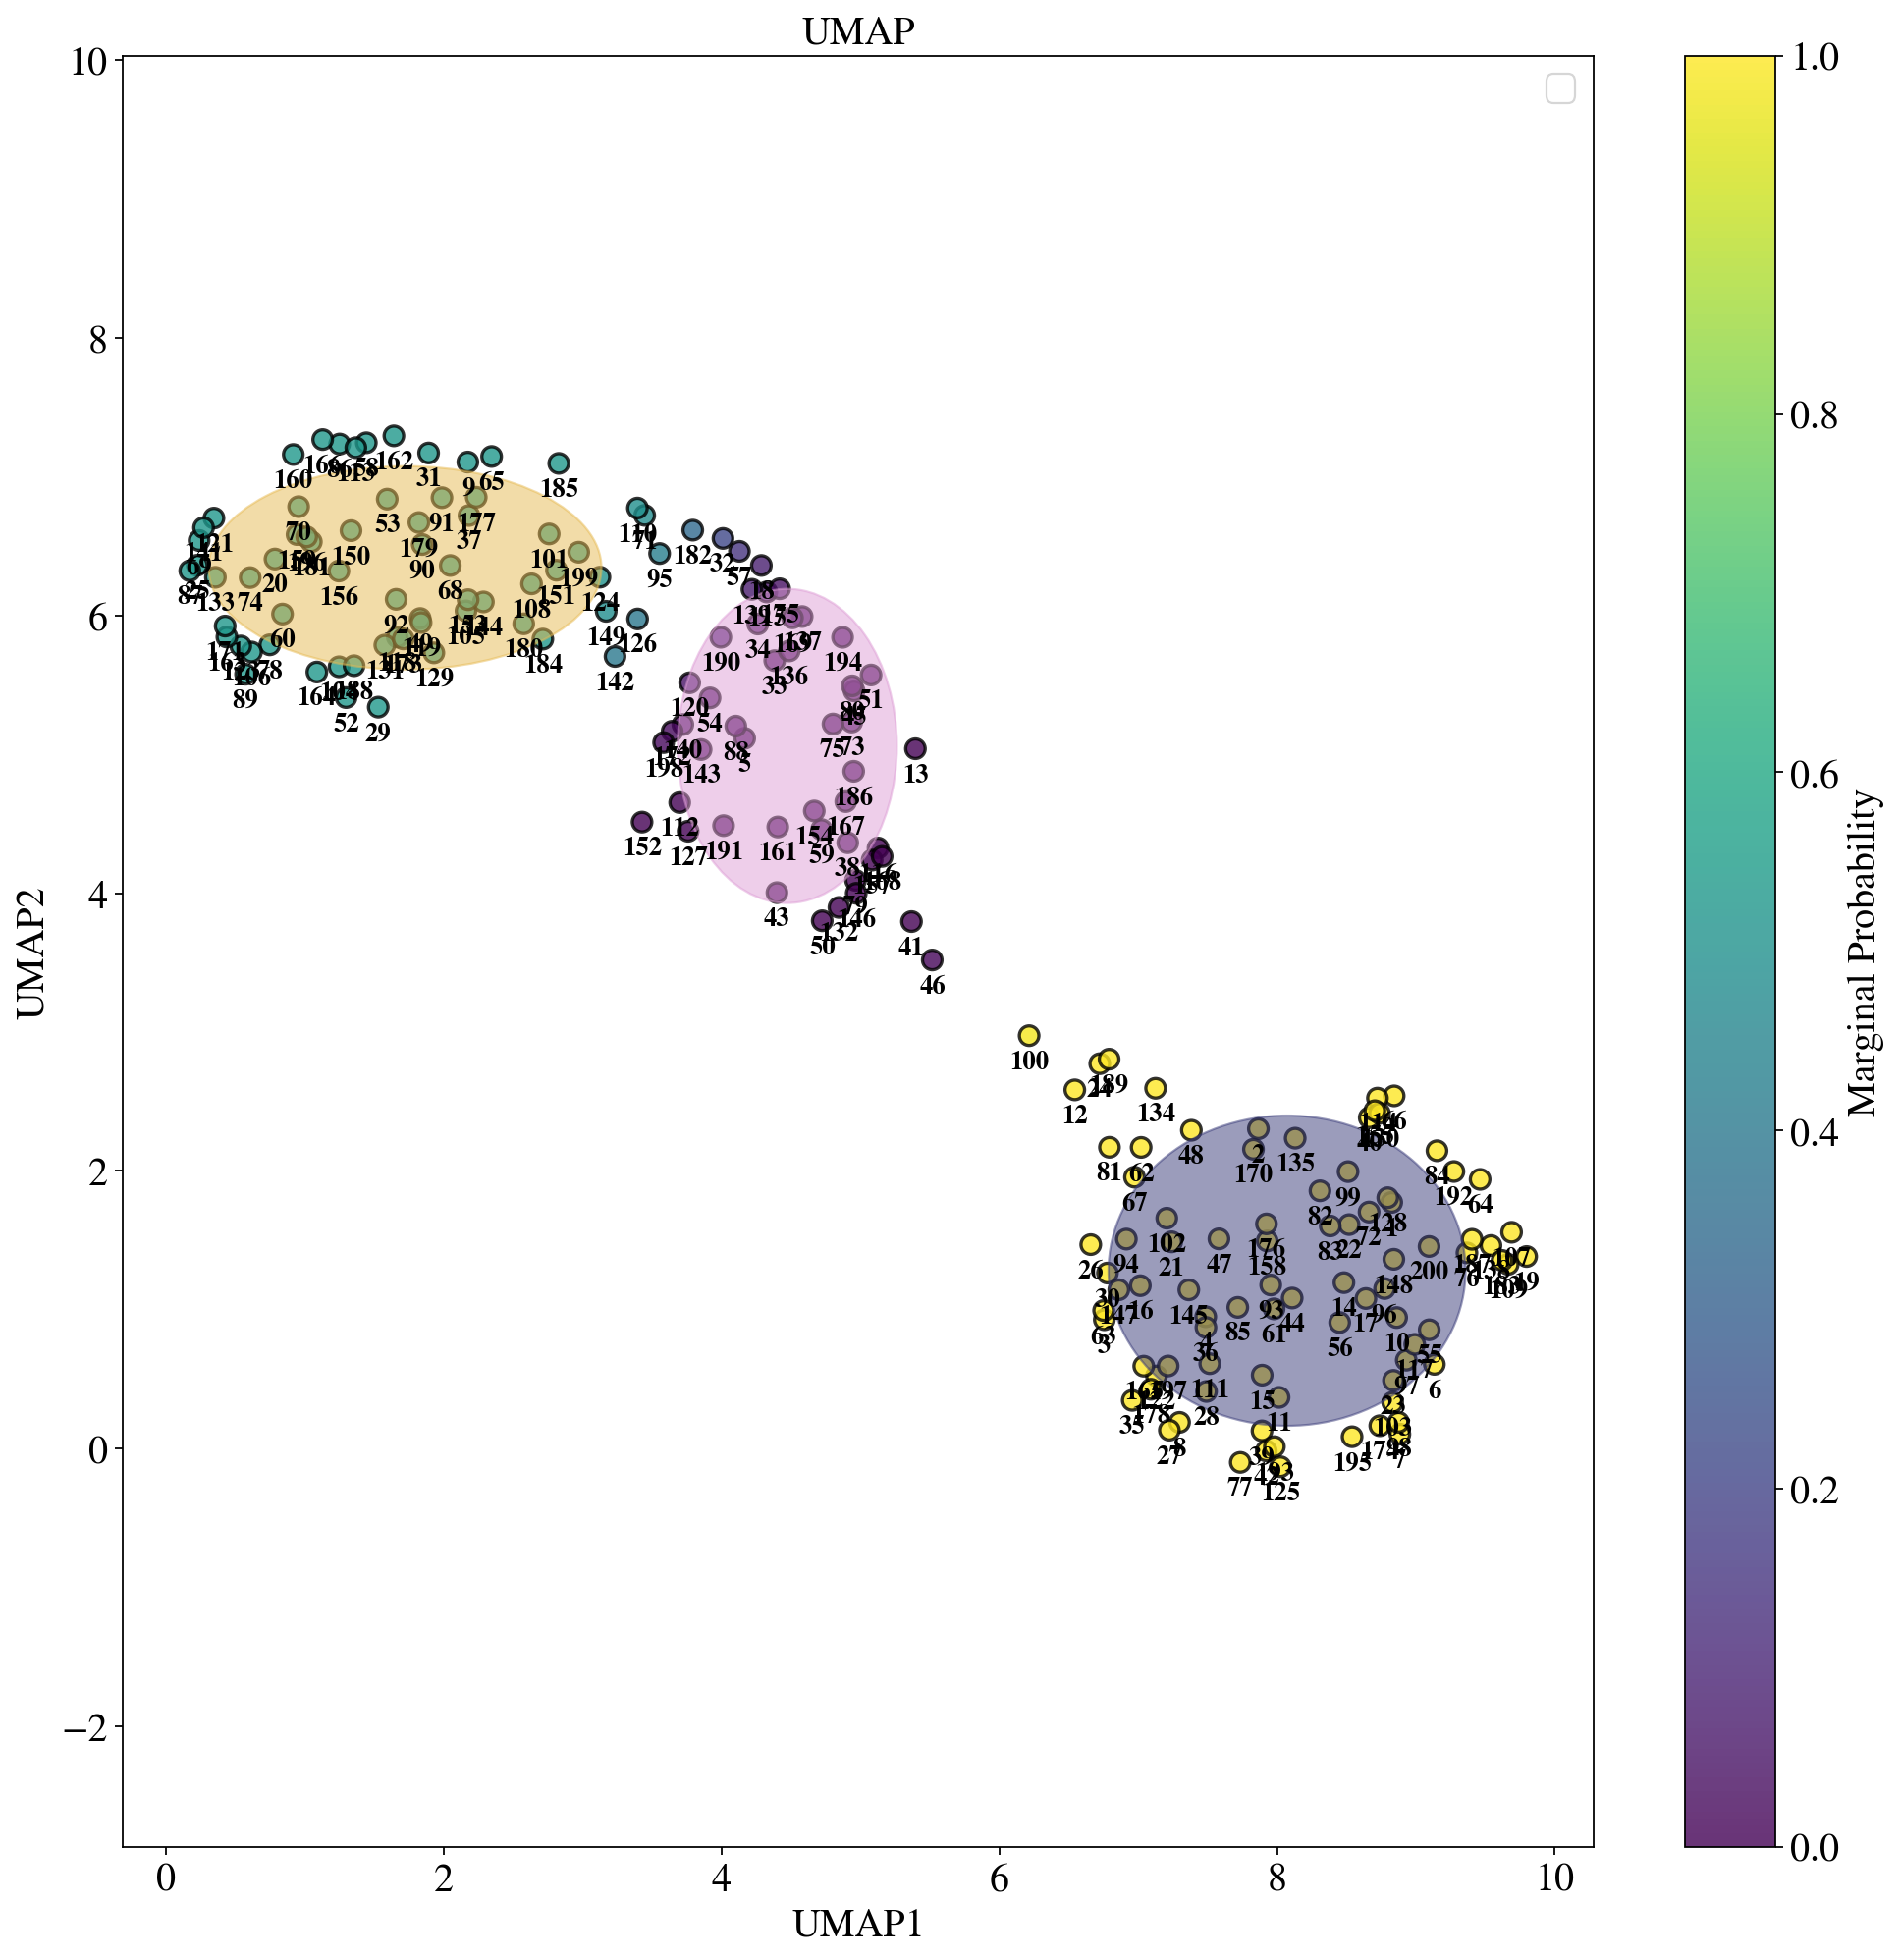

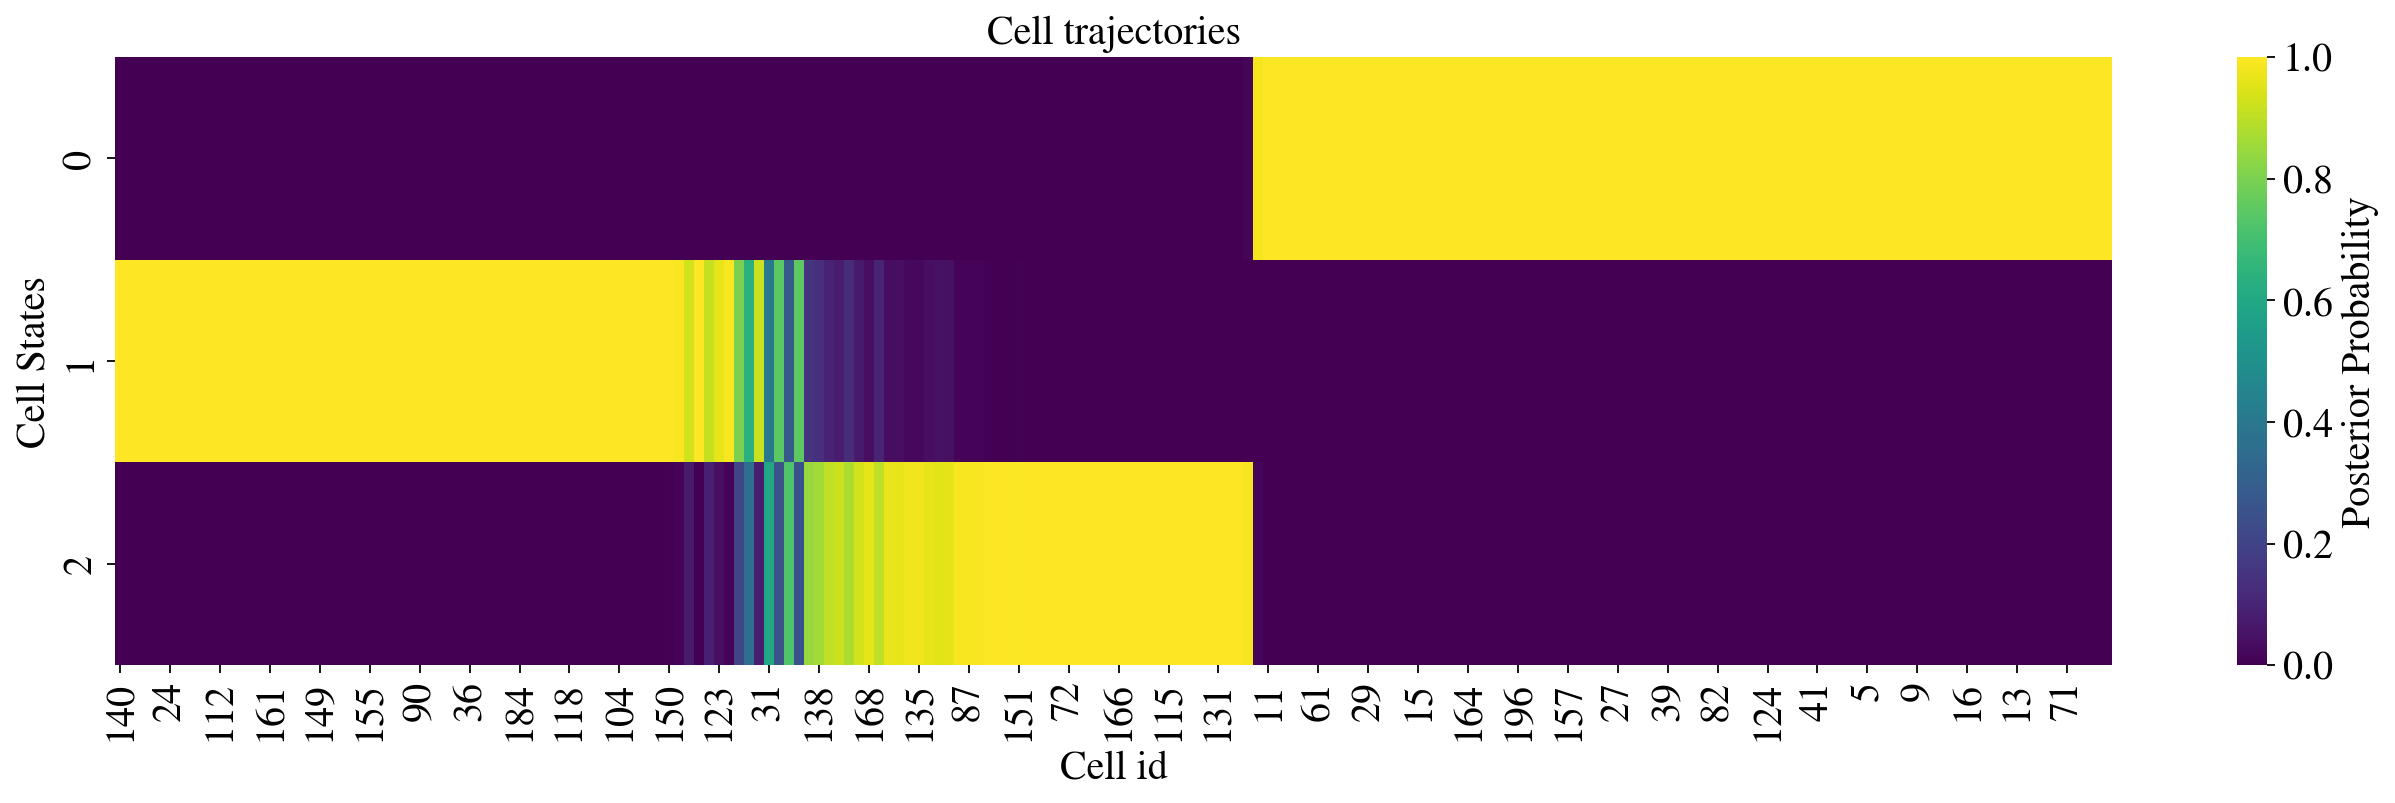

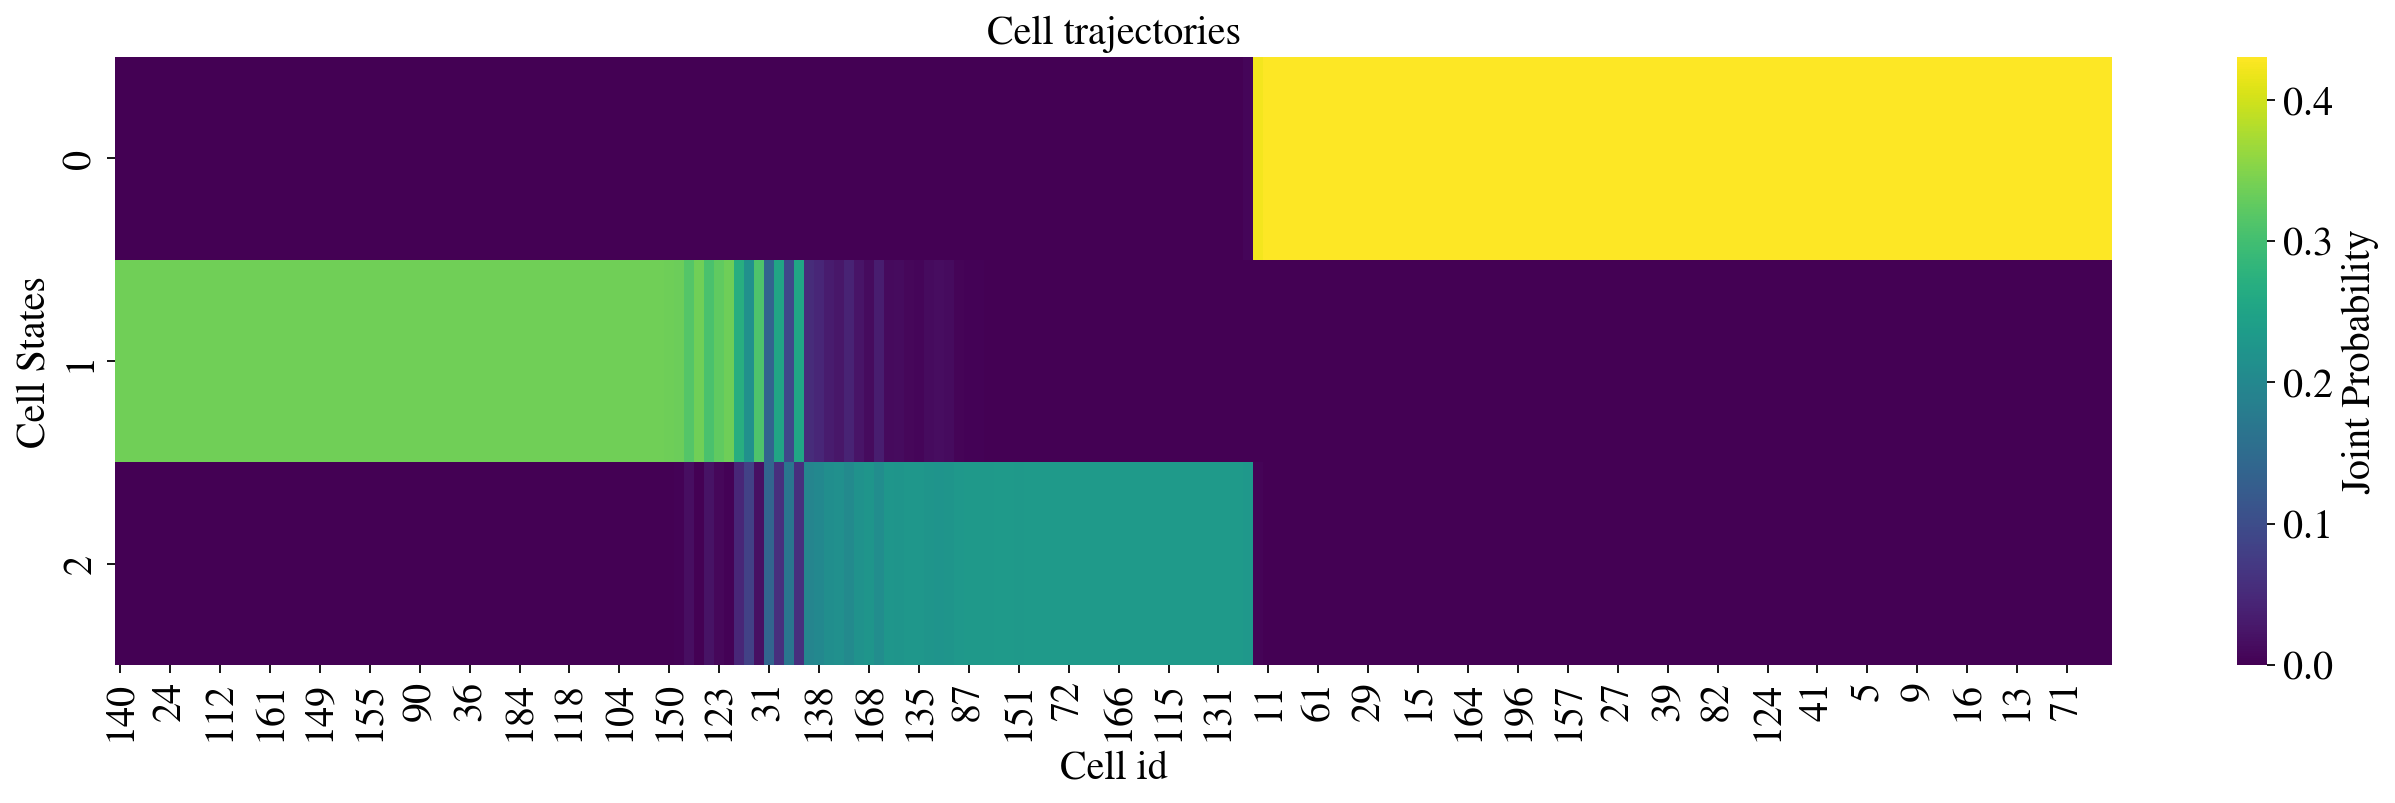

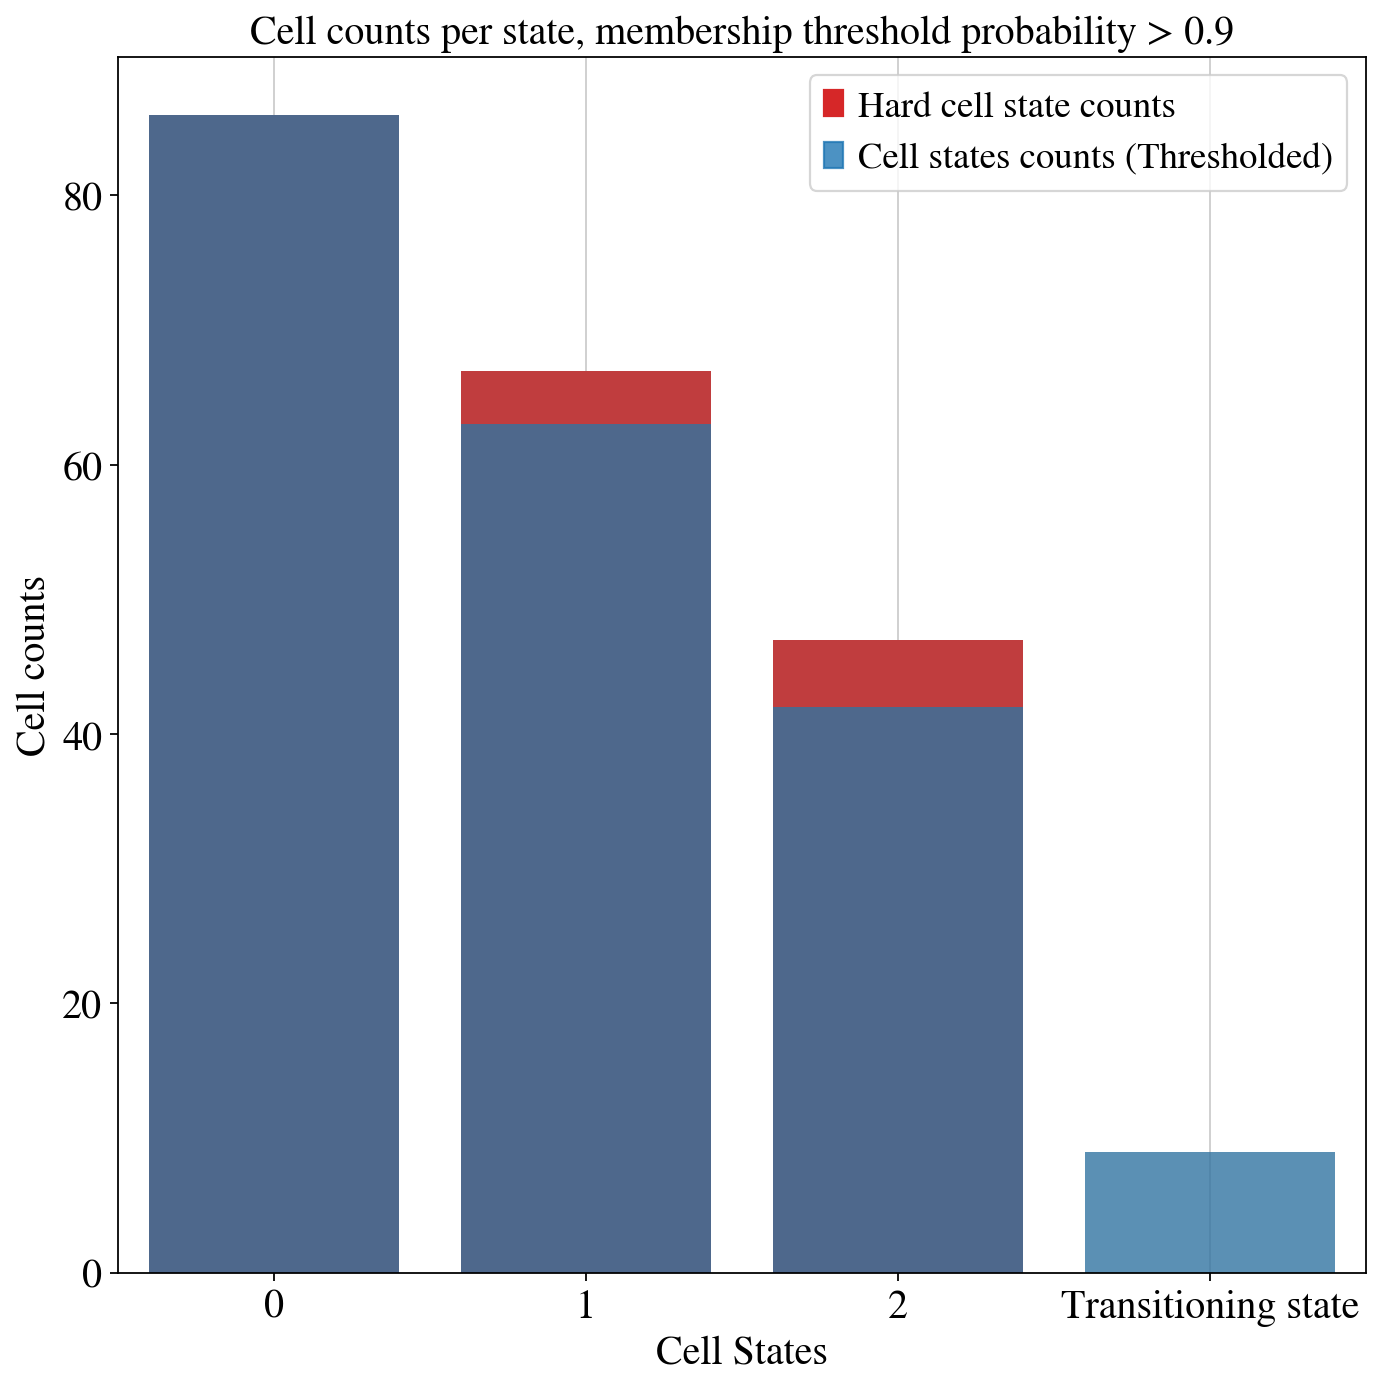

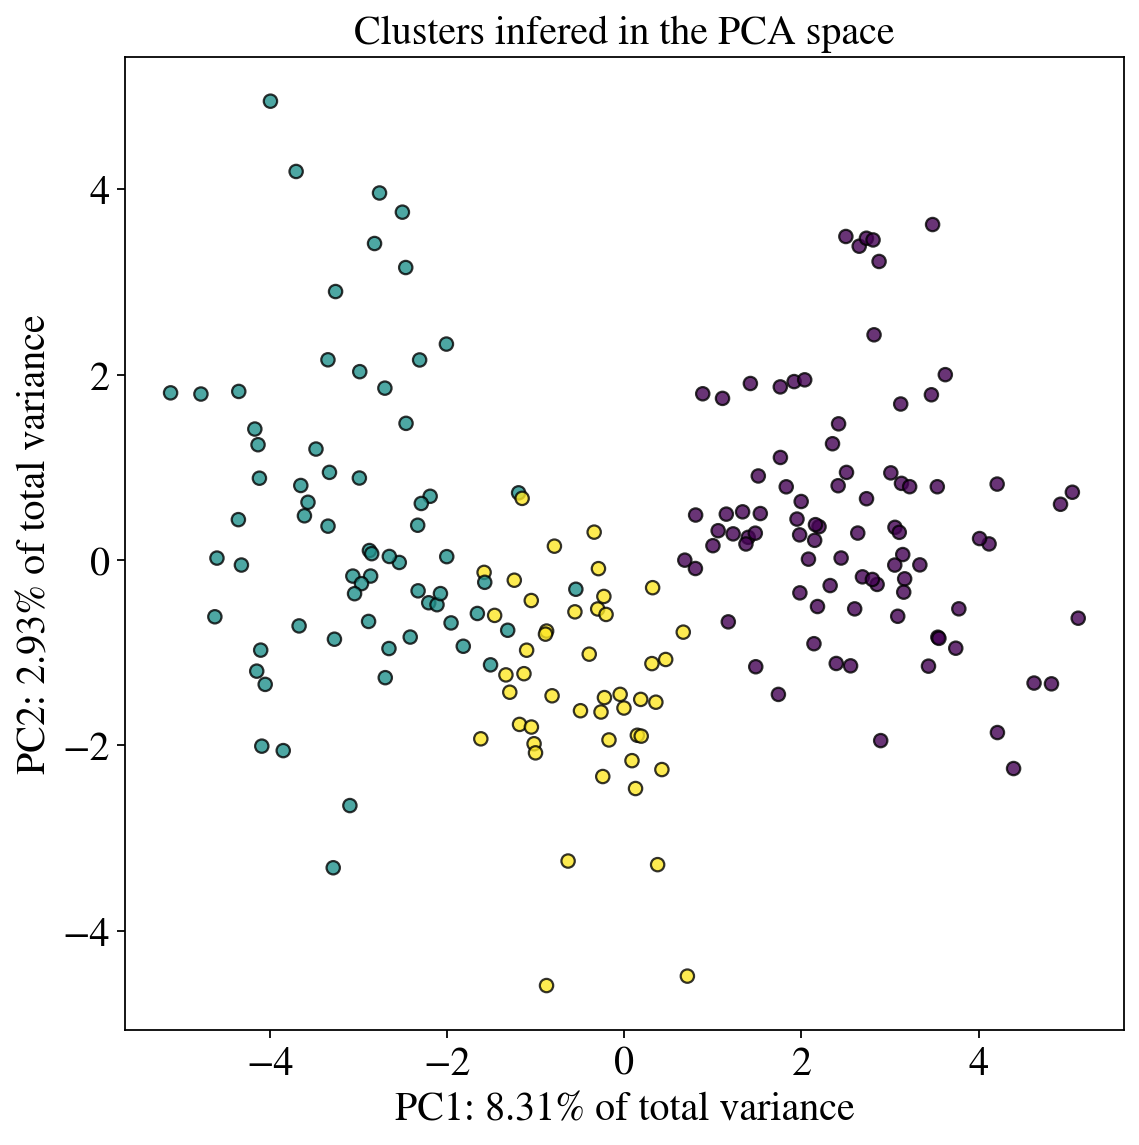

In [3]:
pipeline = scgmix(adata,method="UMAP",rand_seed=42) # Creating an instance of Preprocess class
pipeline.preprocess(mads_away=5,feature_selection=False)
pipeline.dimreduction(plot_result=True, pc_selection_method="screeplot",n_pcs=100)
study = pipeline.mix(n_trials=100,enable_preclustering=True,preclustering_method="leiden",criterion = "BIC",max_iter=1000,leiden_resolution=0.2)
labels, posteriorprob, jointprob, marginalprob = pipeline.visualize(membership_threshold=0.90,cmap="viridis")

# **Dataset 3**


screeplot selected 3 principal components out of 100


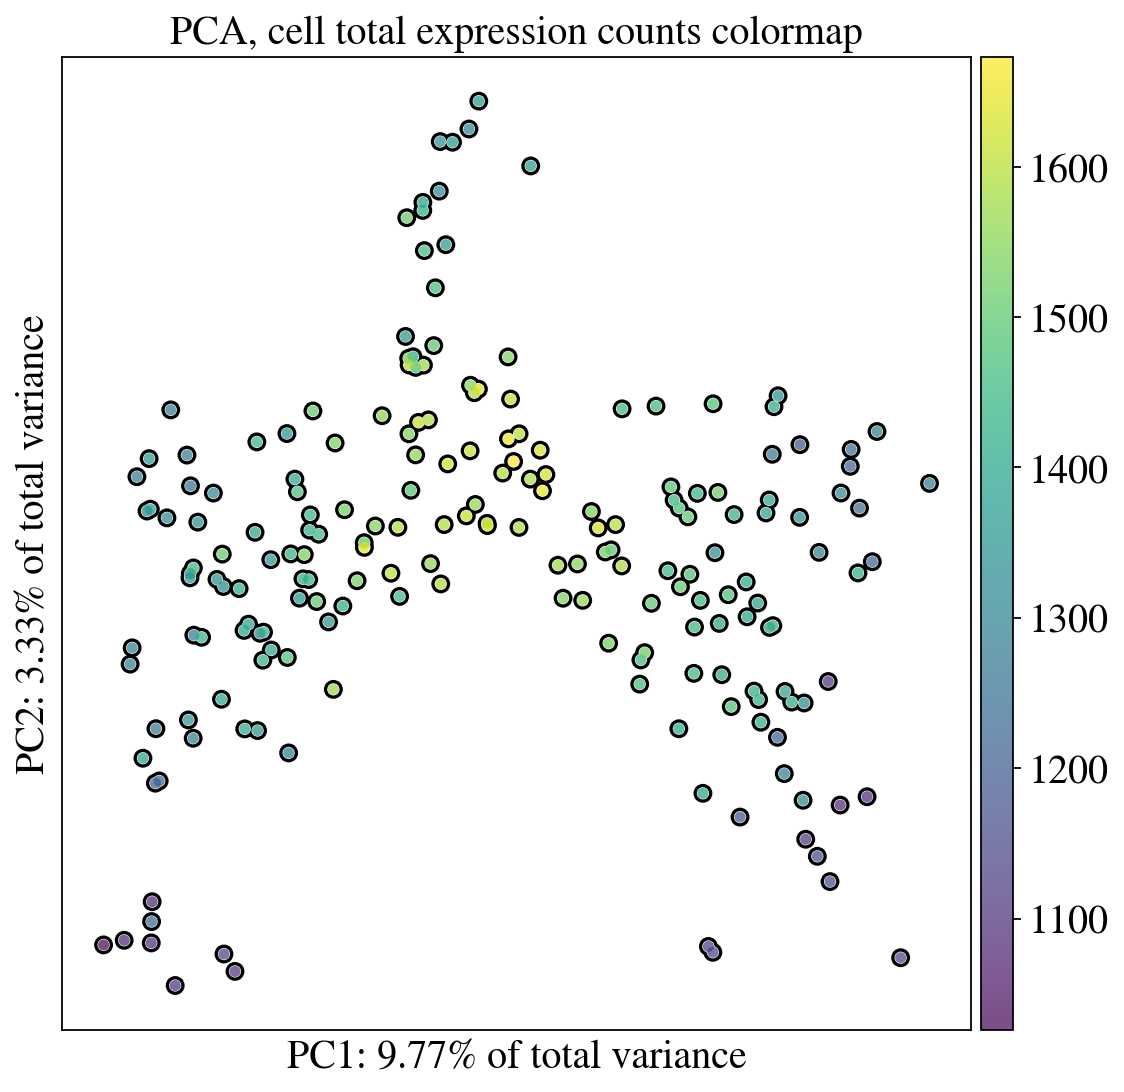

Gaussian Mixture model with BIC = 2456.1943623845377
GaussianMixture(init_params='k-means++', max_iter=1000, n_components=2,
                random_state=49)


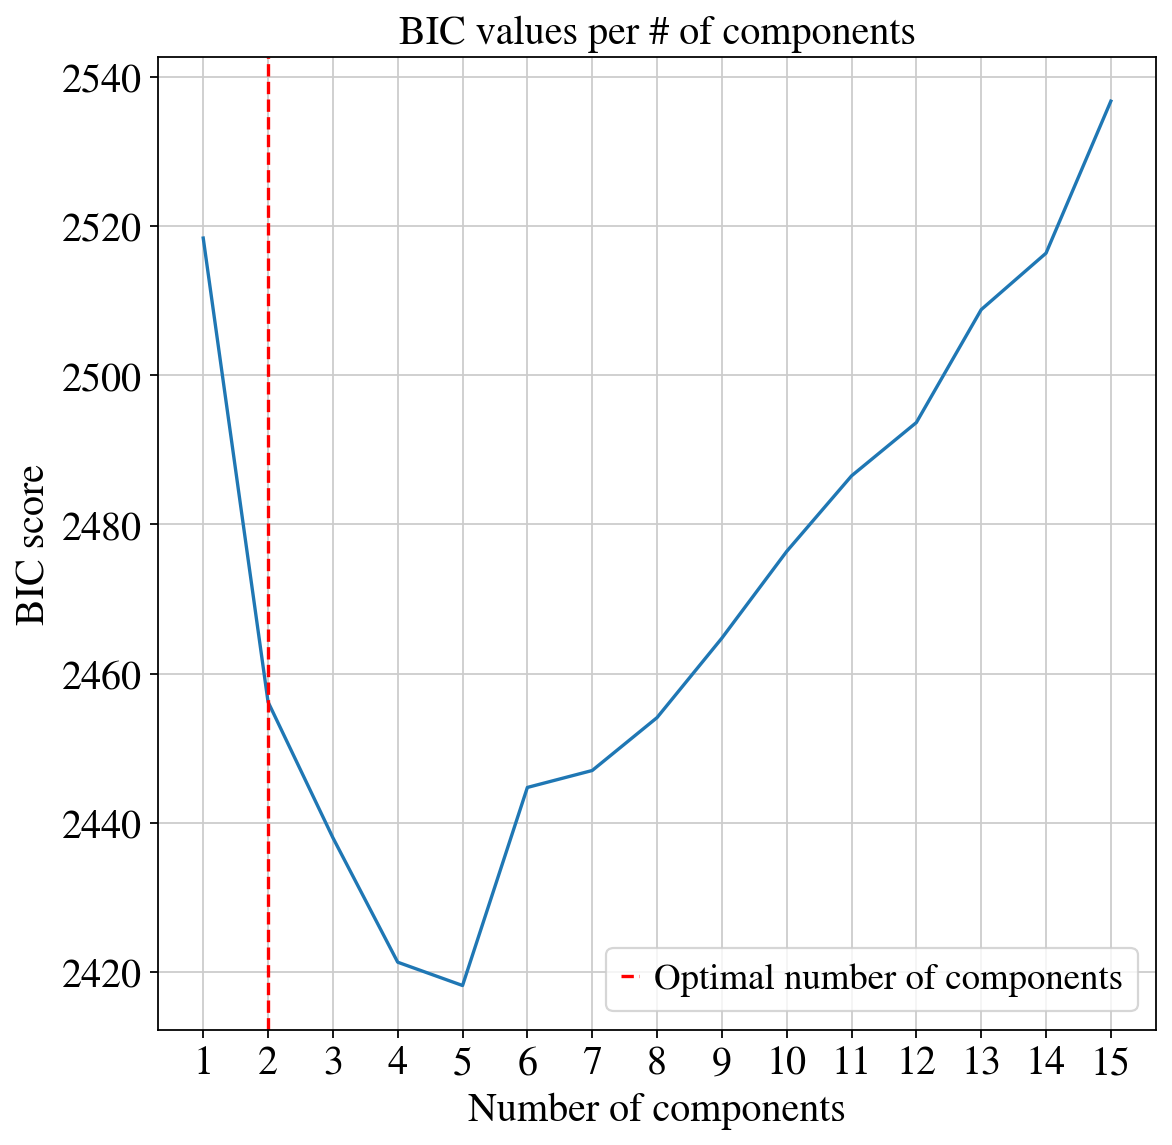

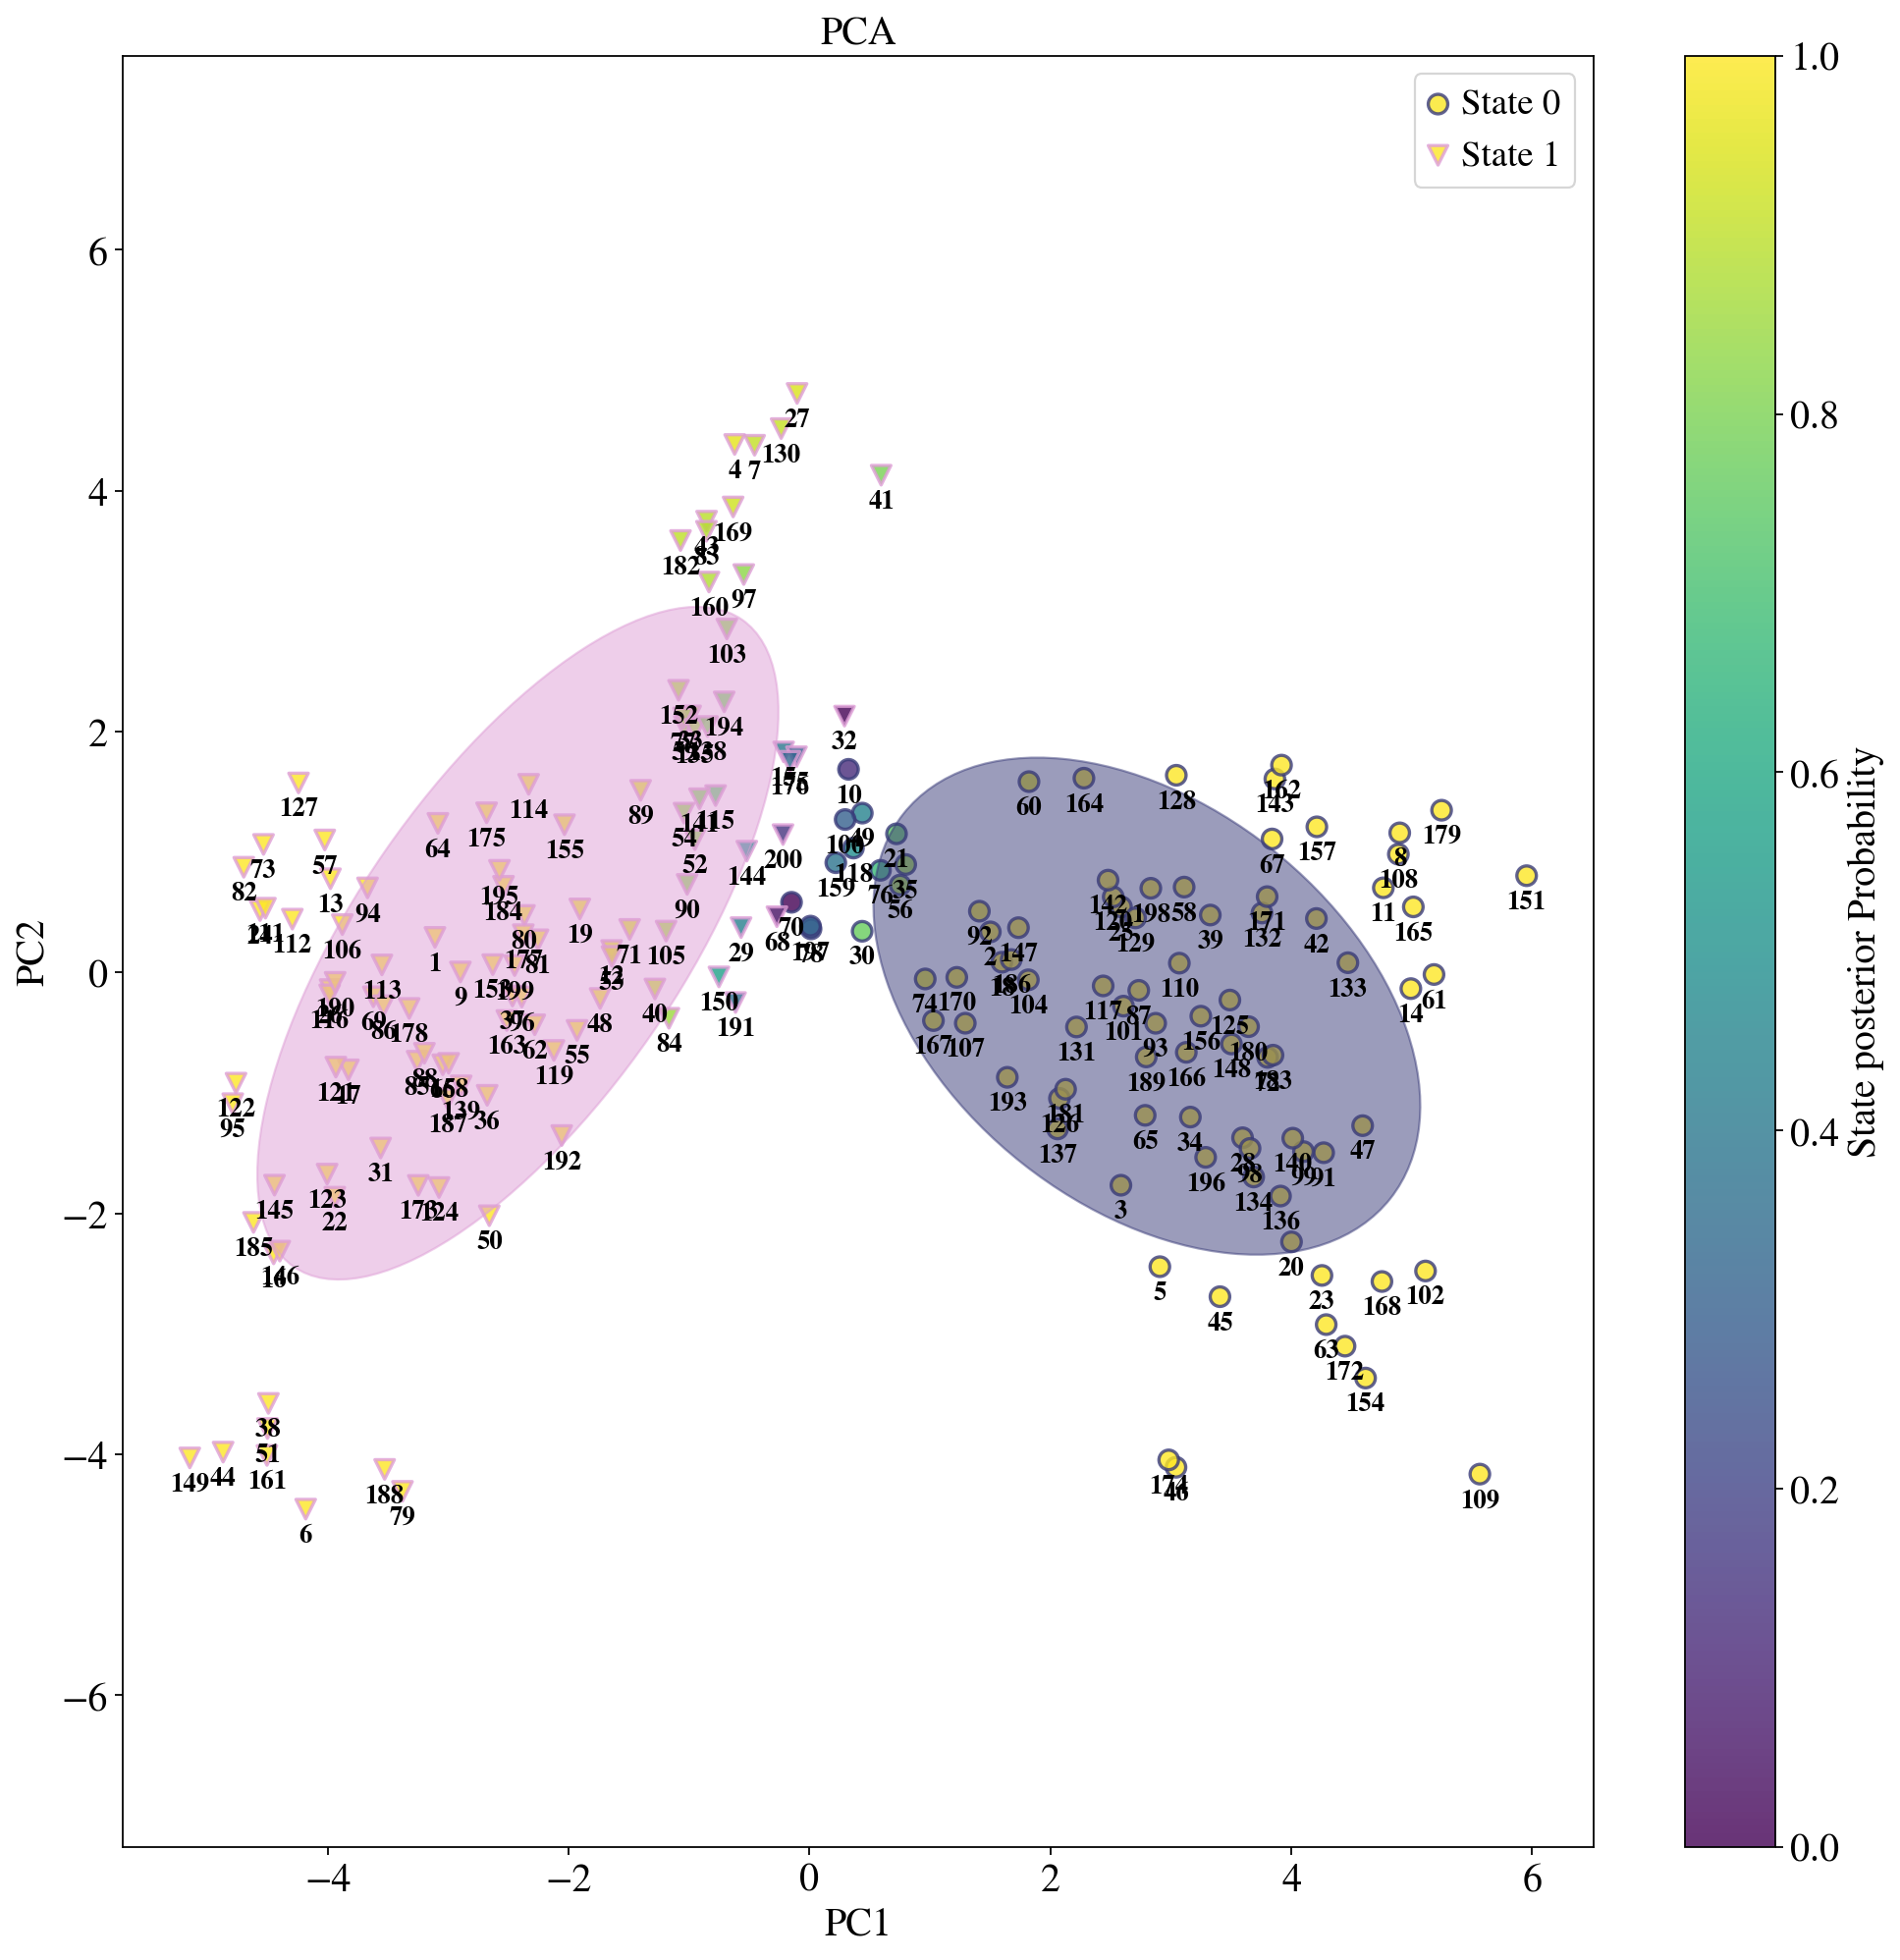

No handles with labels found to put in legend.


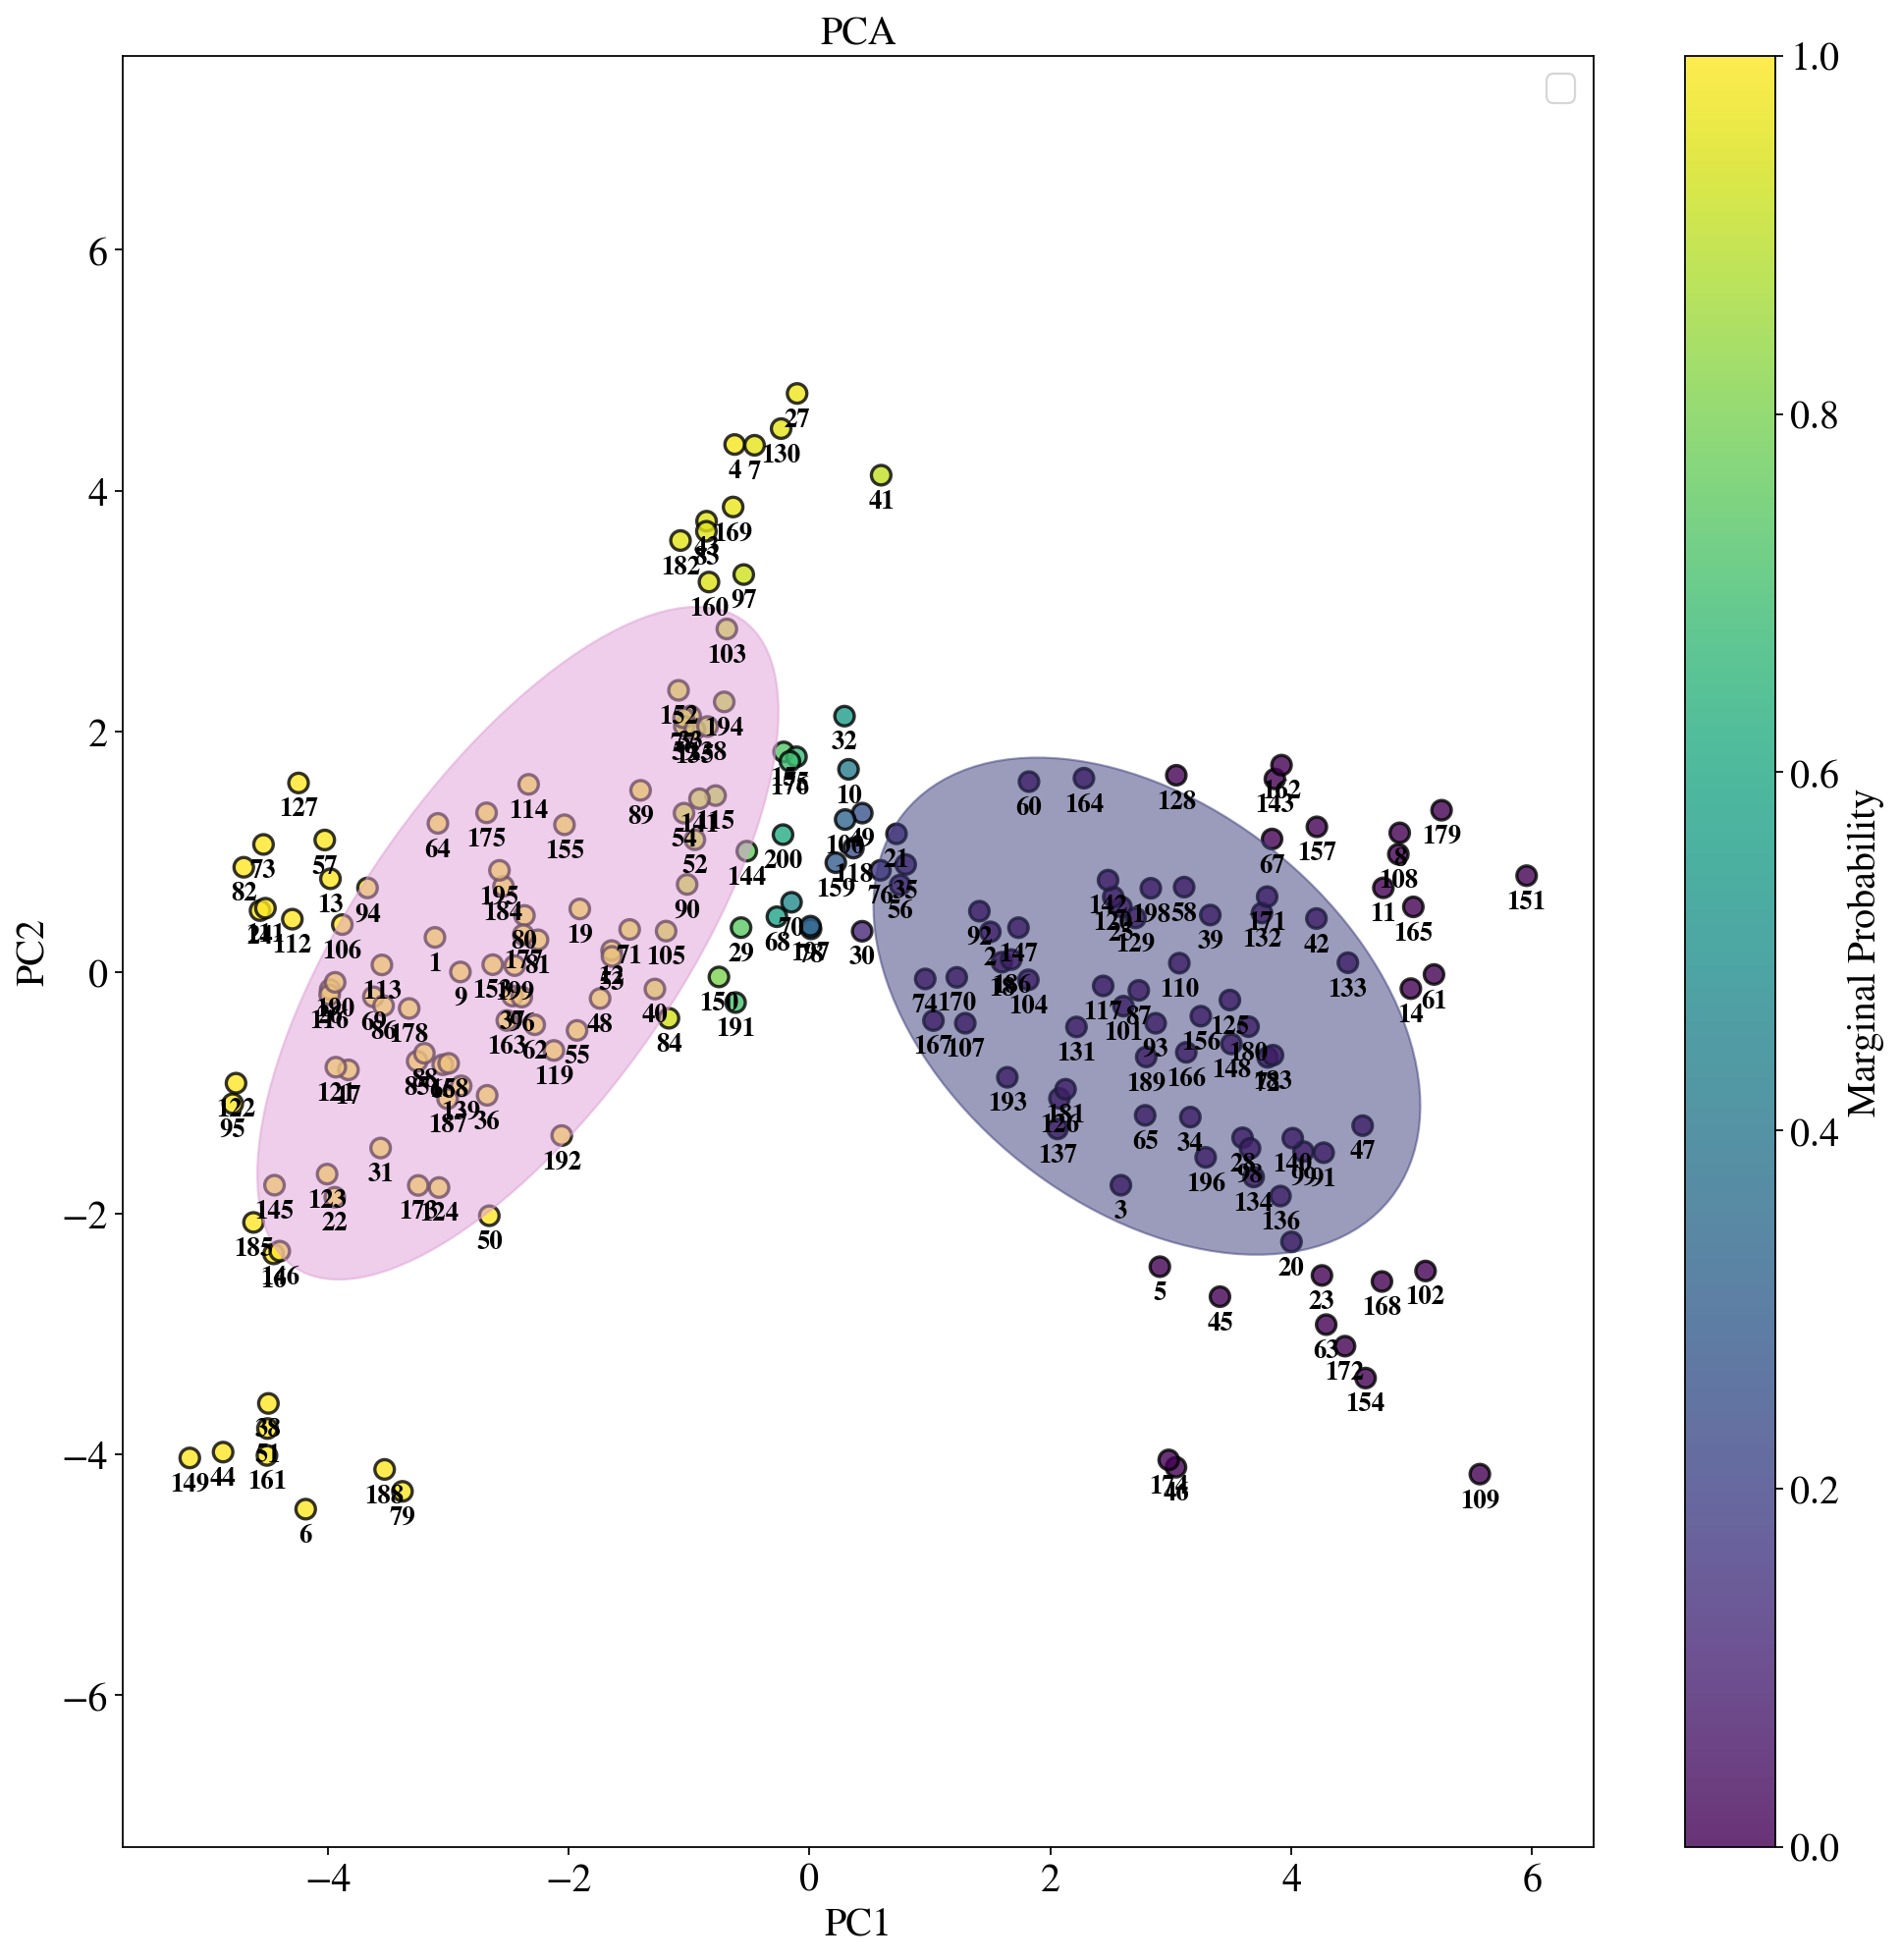

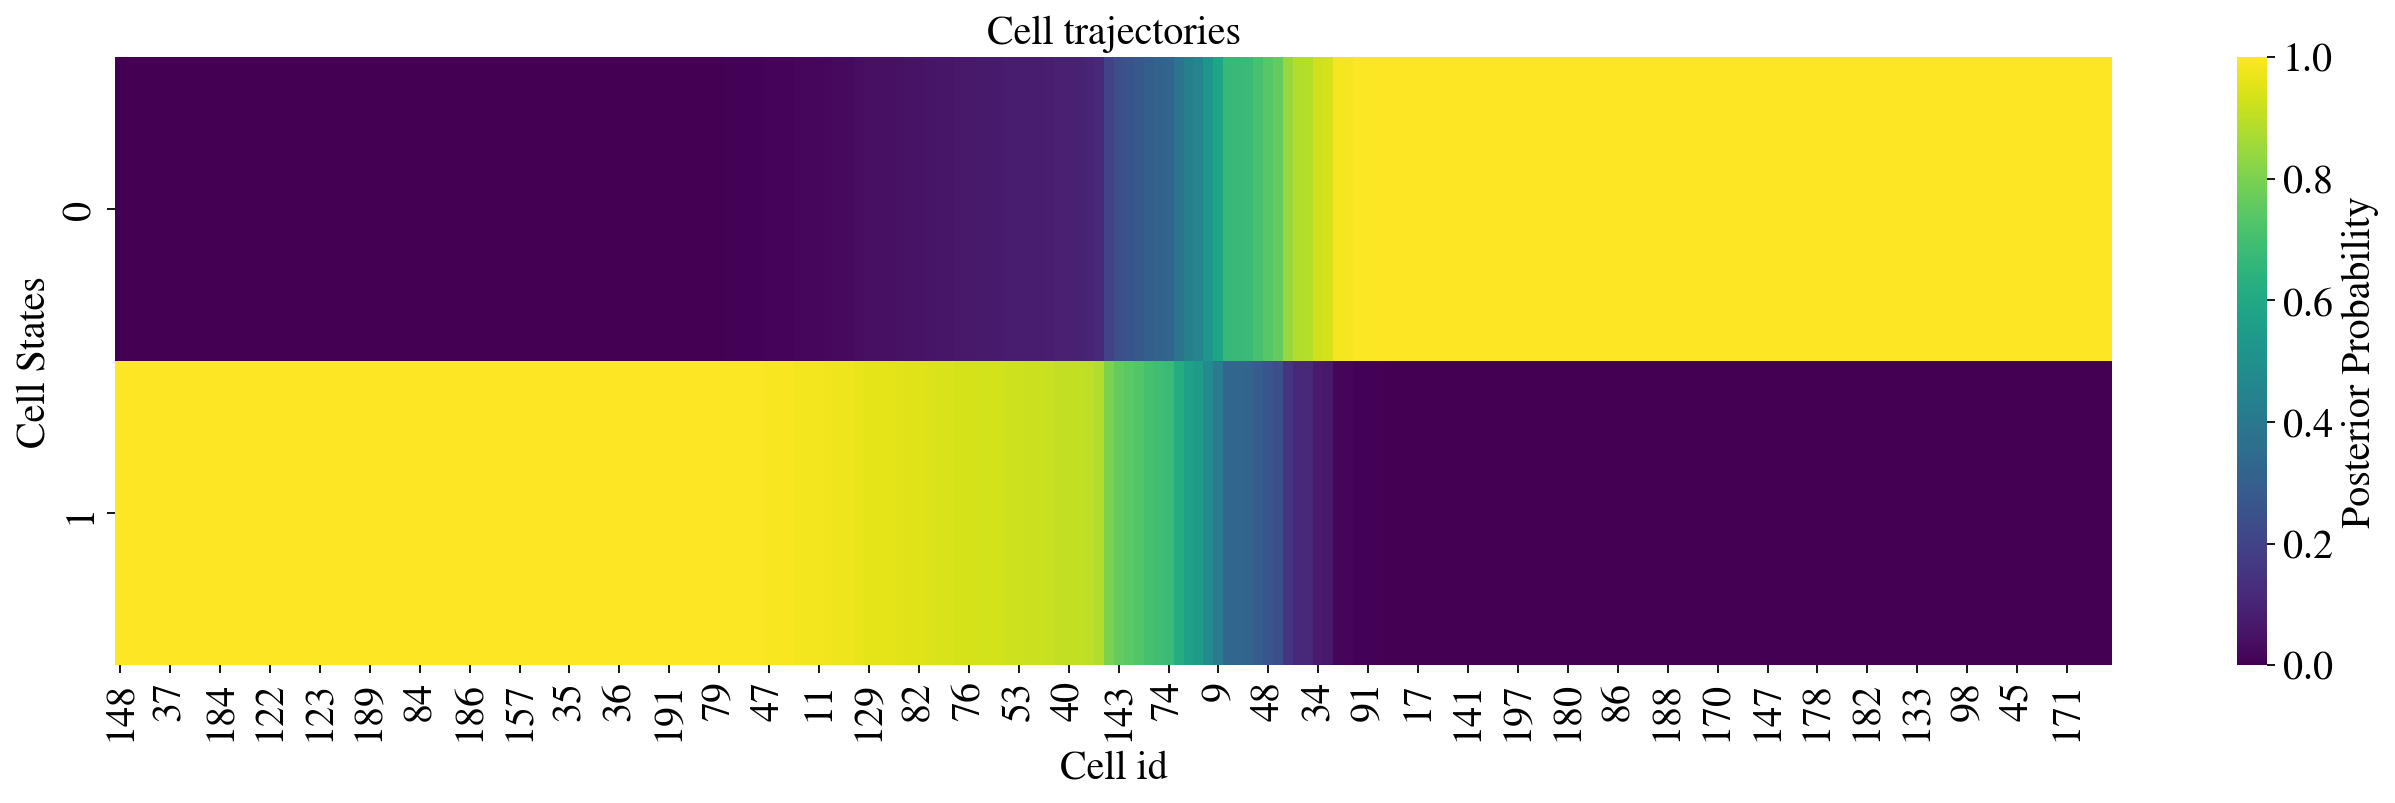

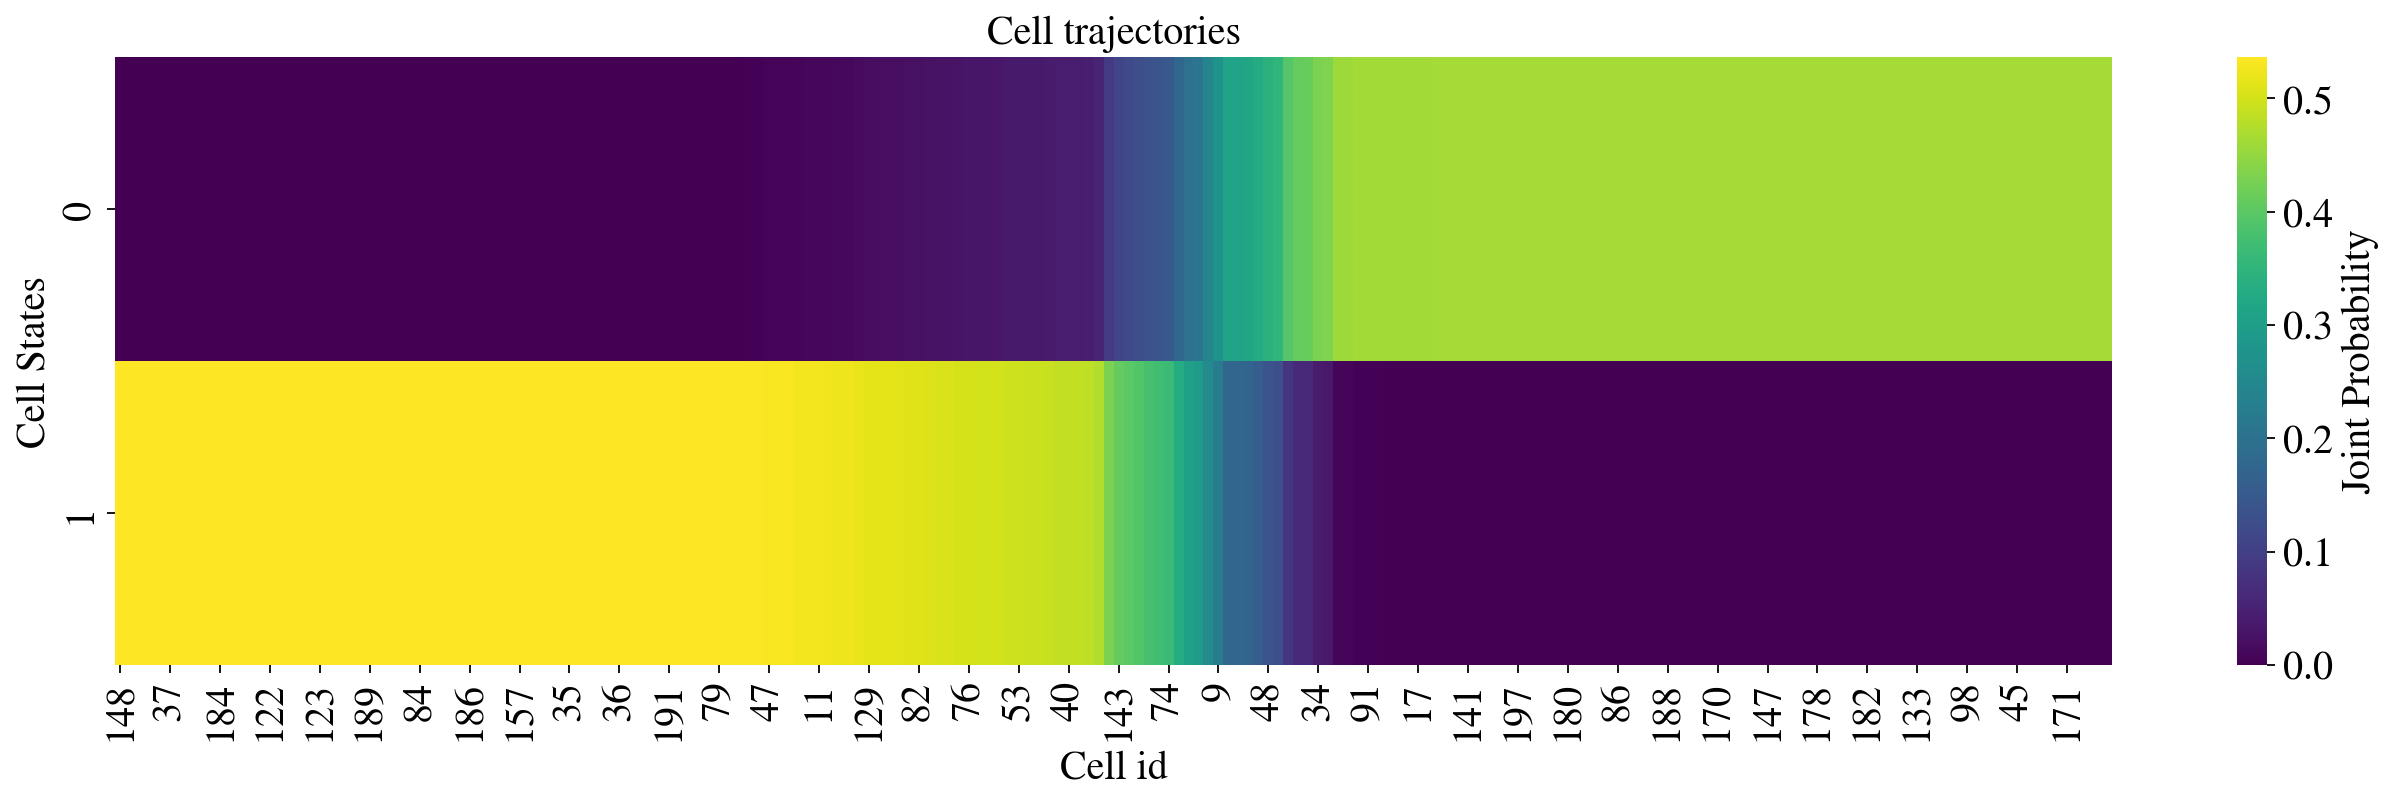

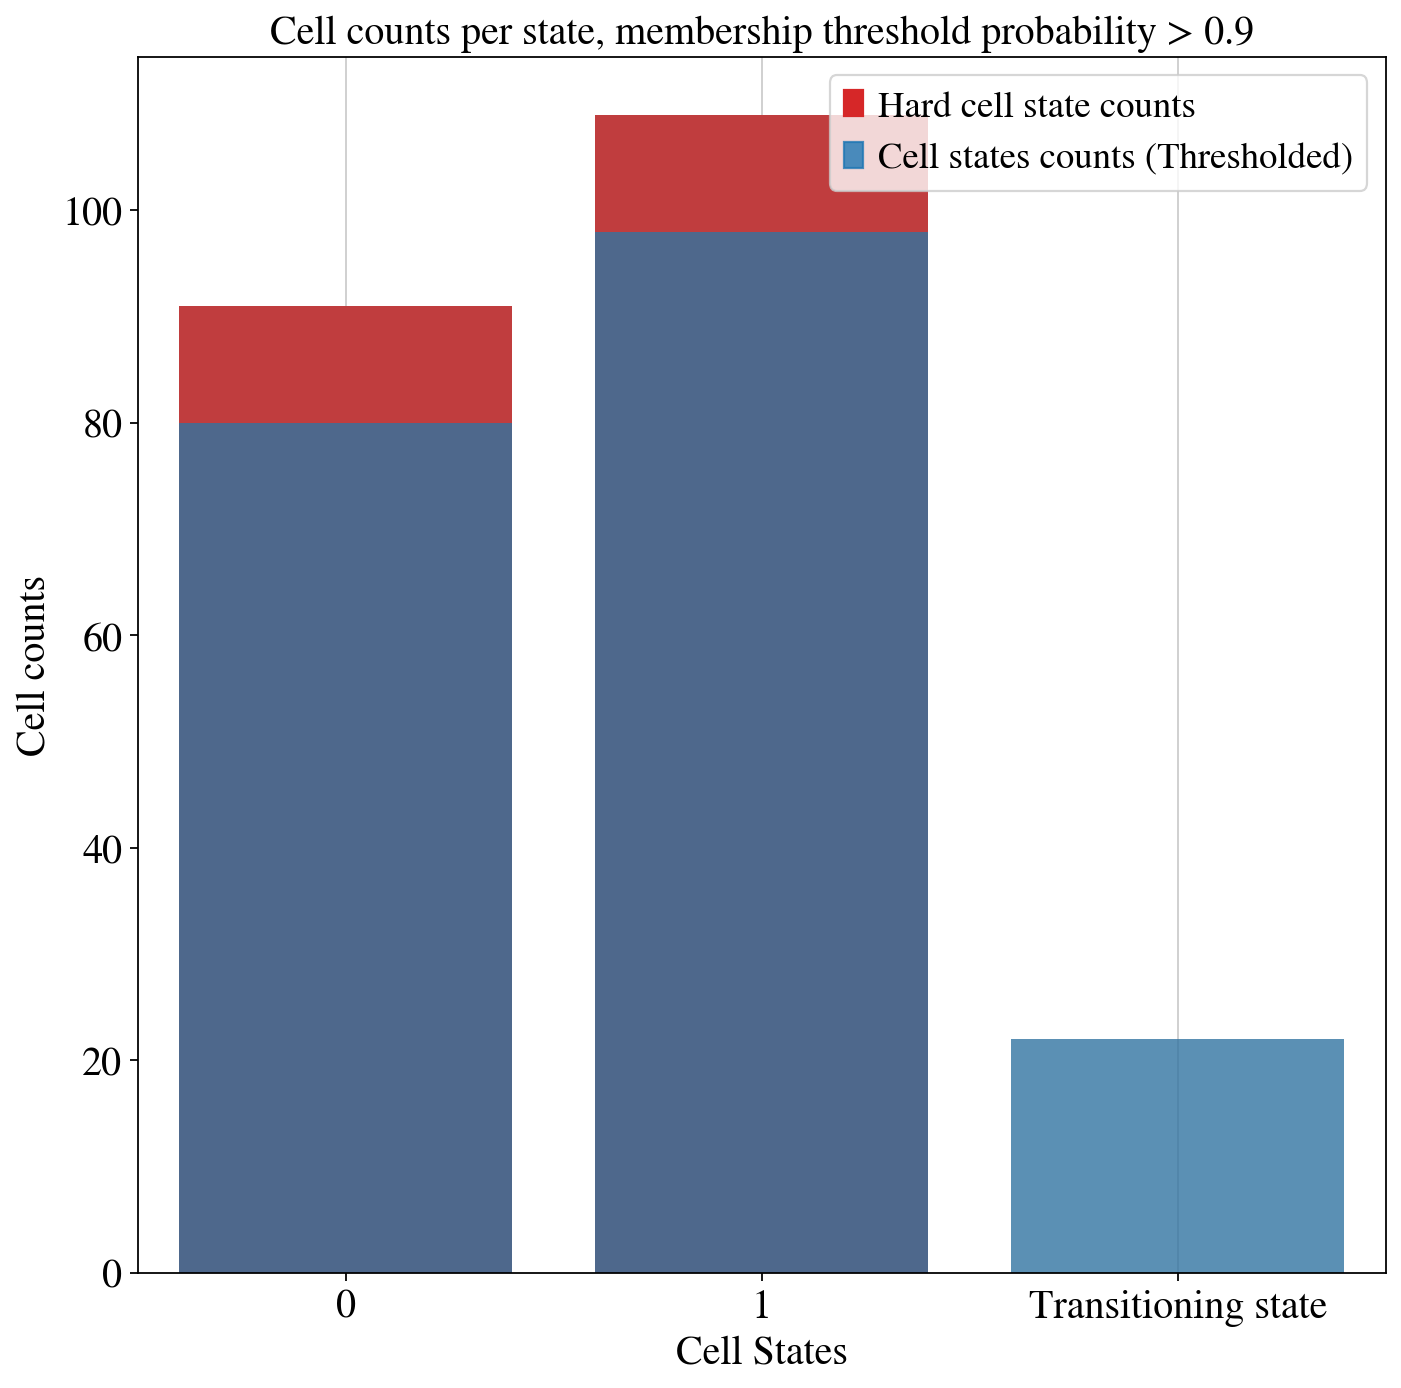

'full'

In [4]:
adata = sc.read_csv("datasets/dataset3.csv")
pipeline = scgmix(adata,method="PCA",rand_seed=42) # Creating an instance of Preprocess class
pipeline.preprocess(mads_away=5,feature_selection=False)
pipeline.dimreduction(plot_result=True, pc_selection_method="screeplot",n_pcs=100)
study = pipeline.mix(n_trials=100,enable_preclustering=False,max_num_components=15,show_progress_bar=False)
labels, posteriorprob, jointprob, marginalprob = pipeline.visualize(membership_threshold=0.90,cmap="viridis")
pipeline.model.covariance_type

# **Dataset 4**


variance selected 125 principal components out of 180


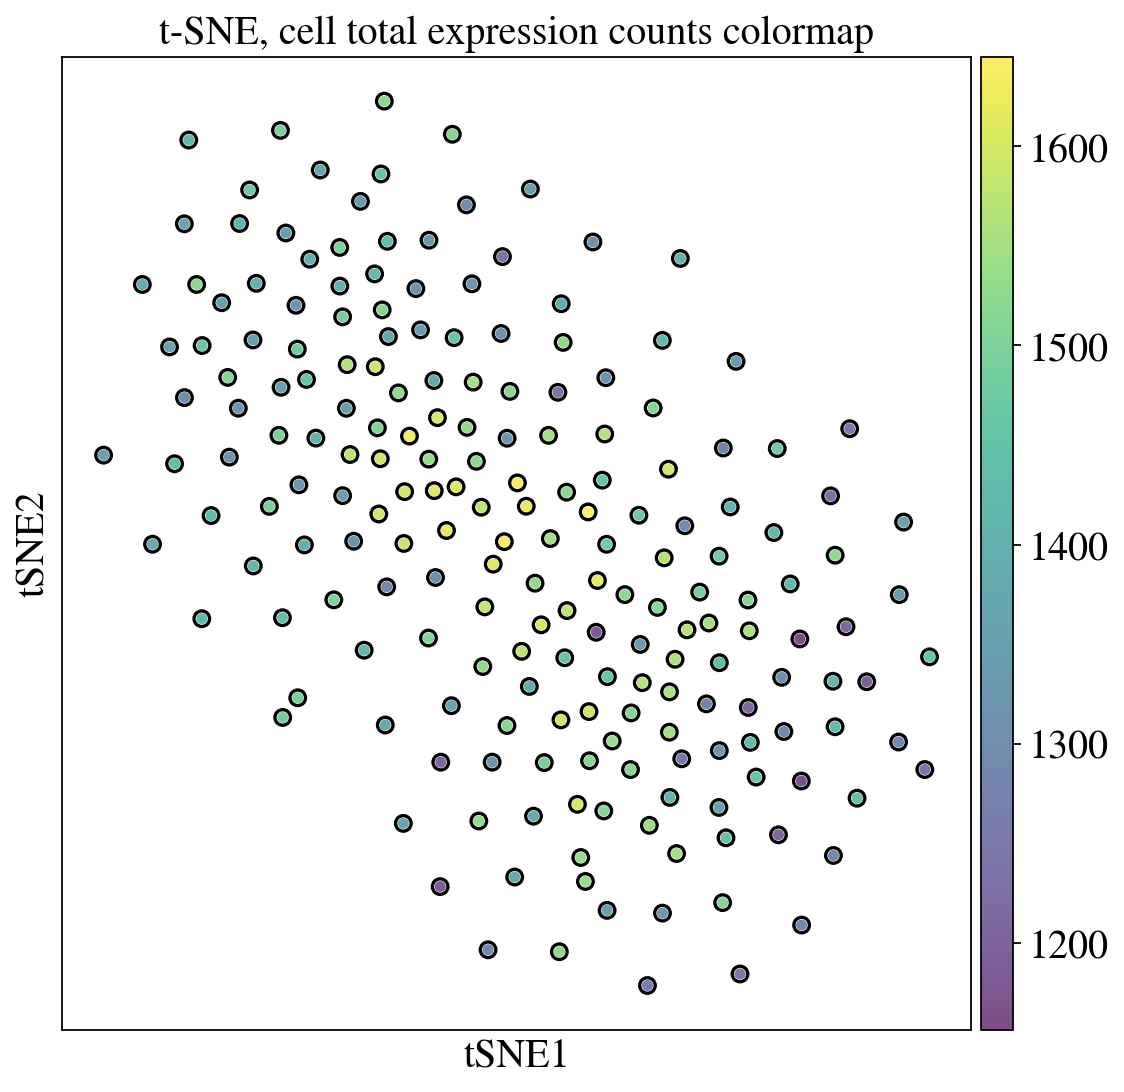

Gaussian Mixture model with BIC = 4344.56711883171
GaussianMixture(covariance_type='spherical', max_iter=1000,
                means_init=array([[-48.56154 ,  48.91049 ],
       [ 43.692654, -37.07727 ]], dtype=float32),
                n_components=2, random_state=4)


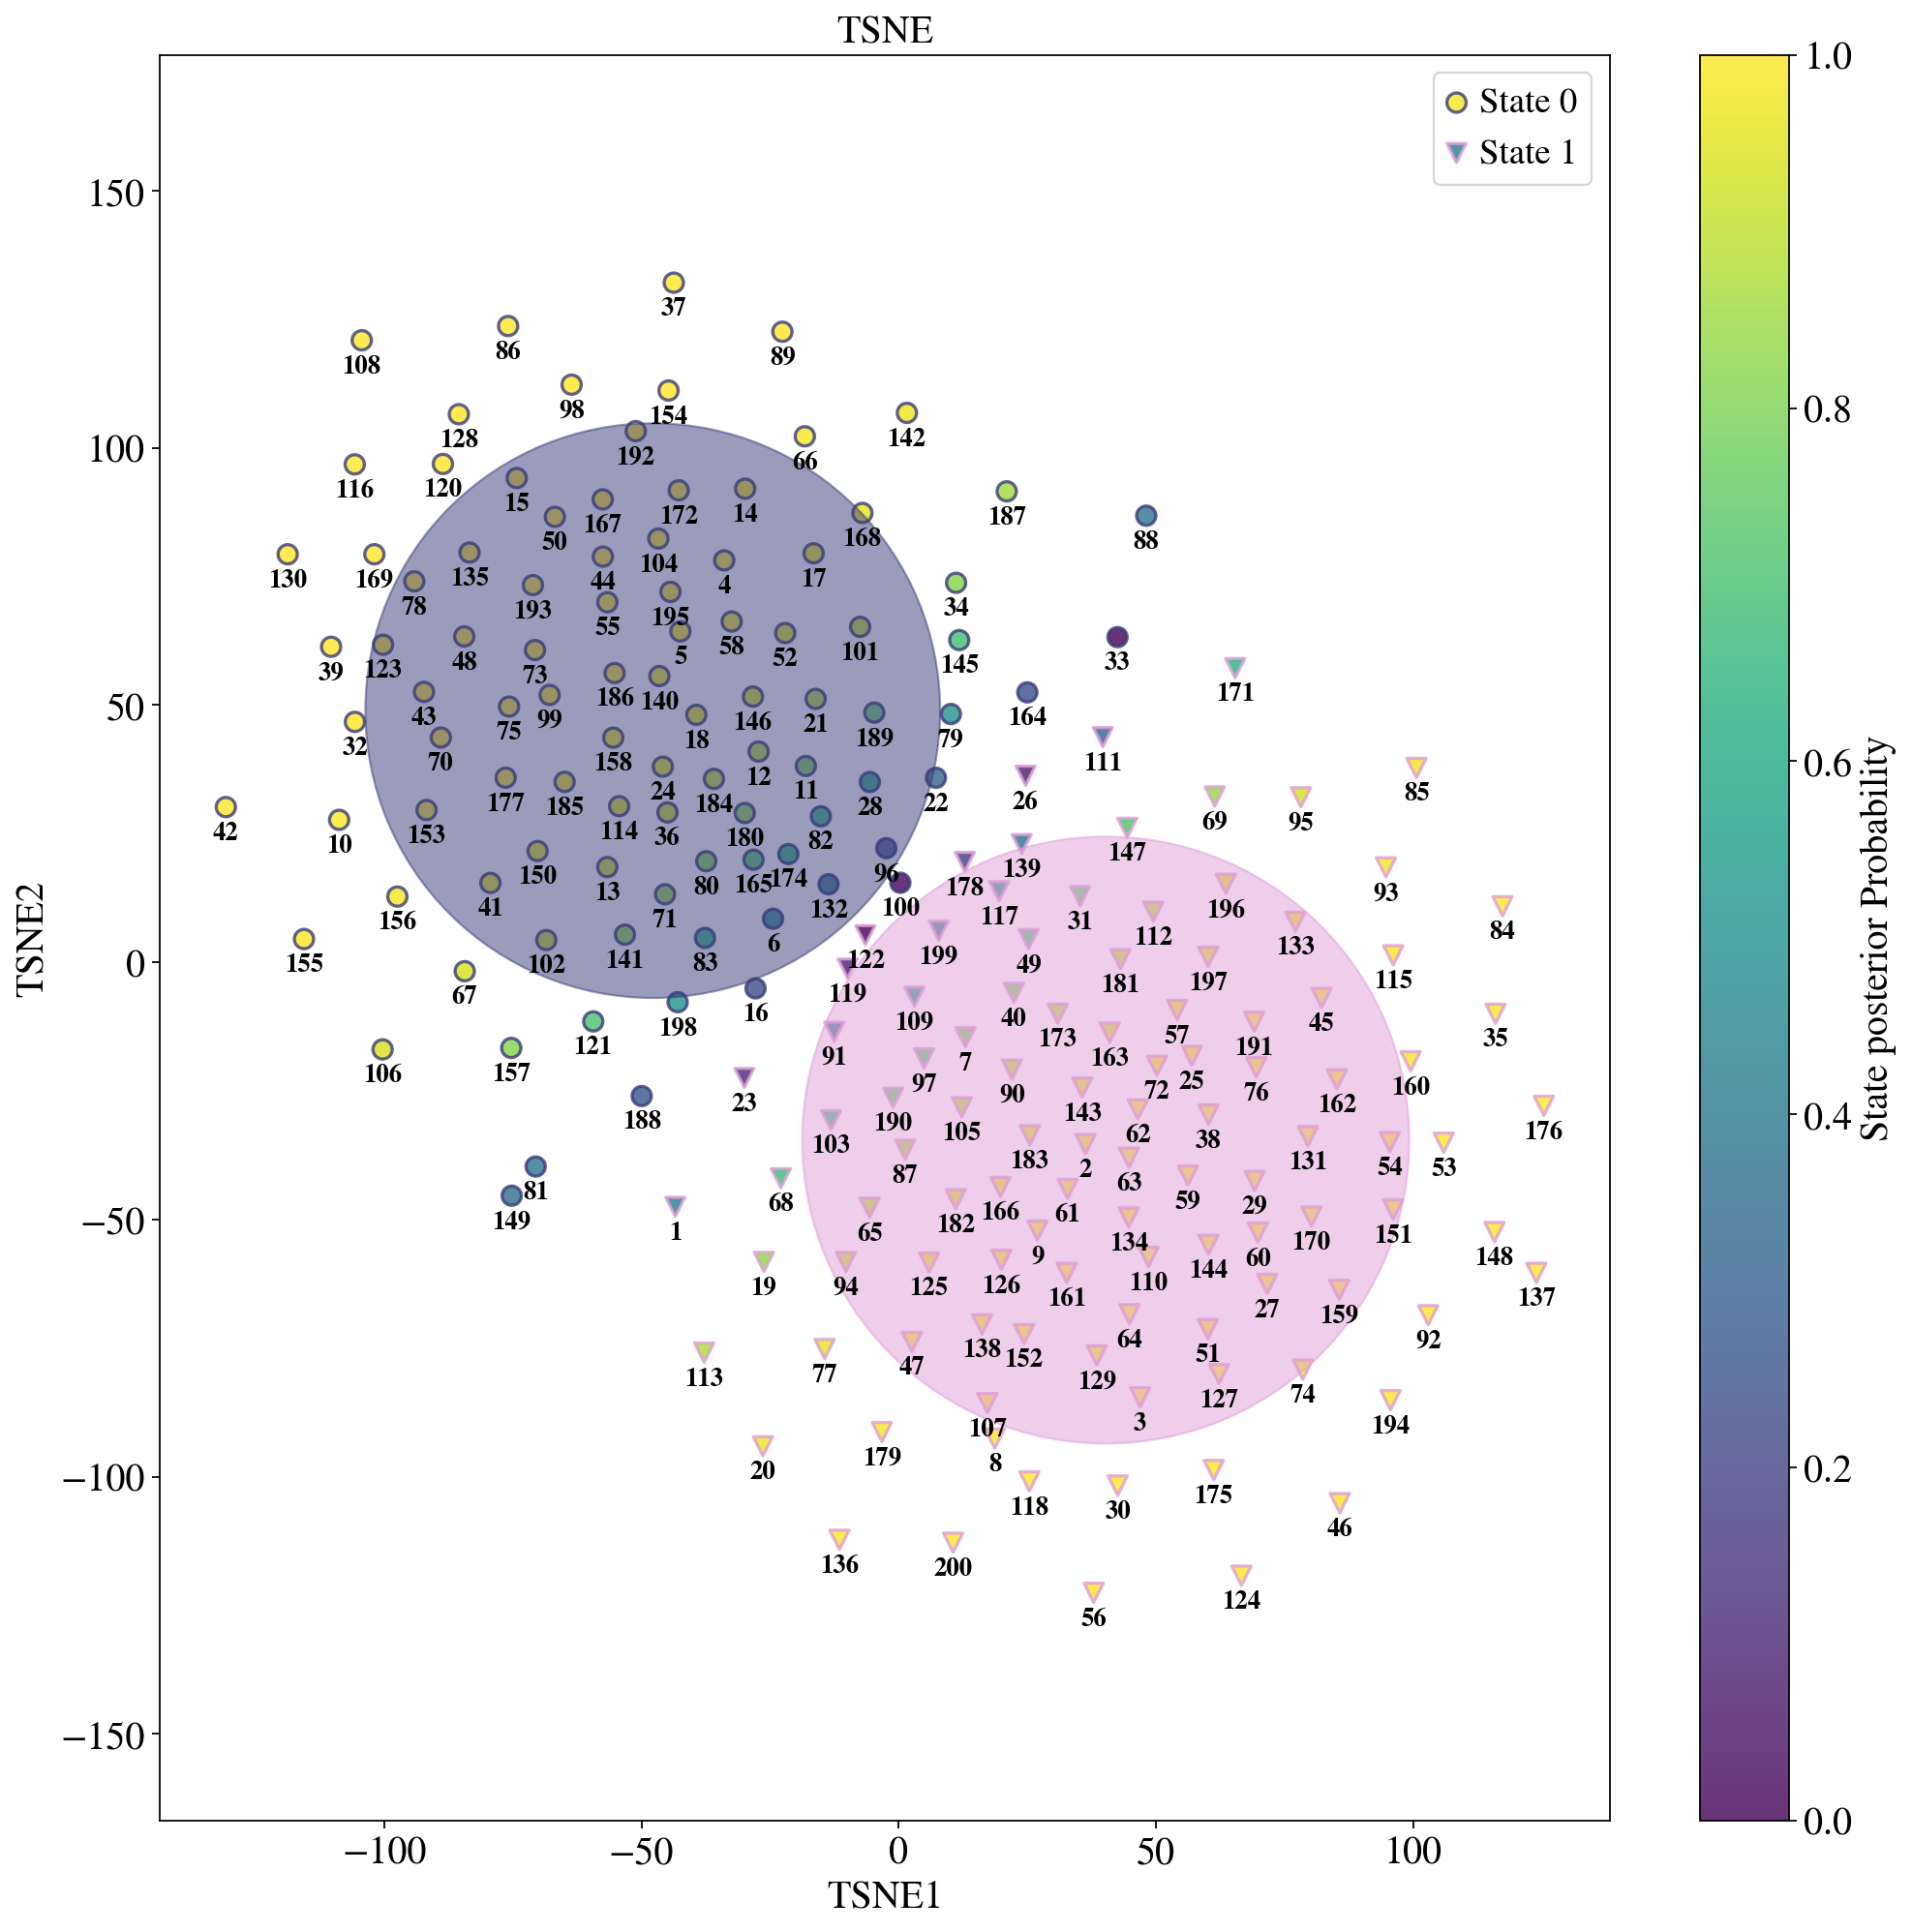

No handles with labels found to put in legend.


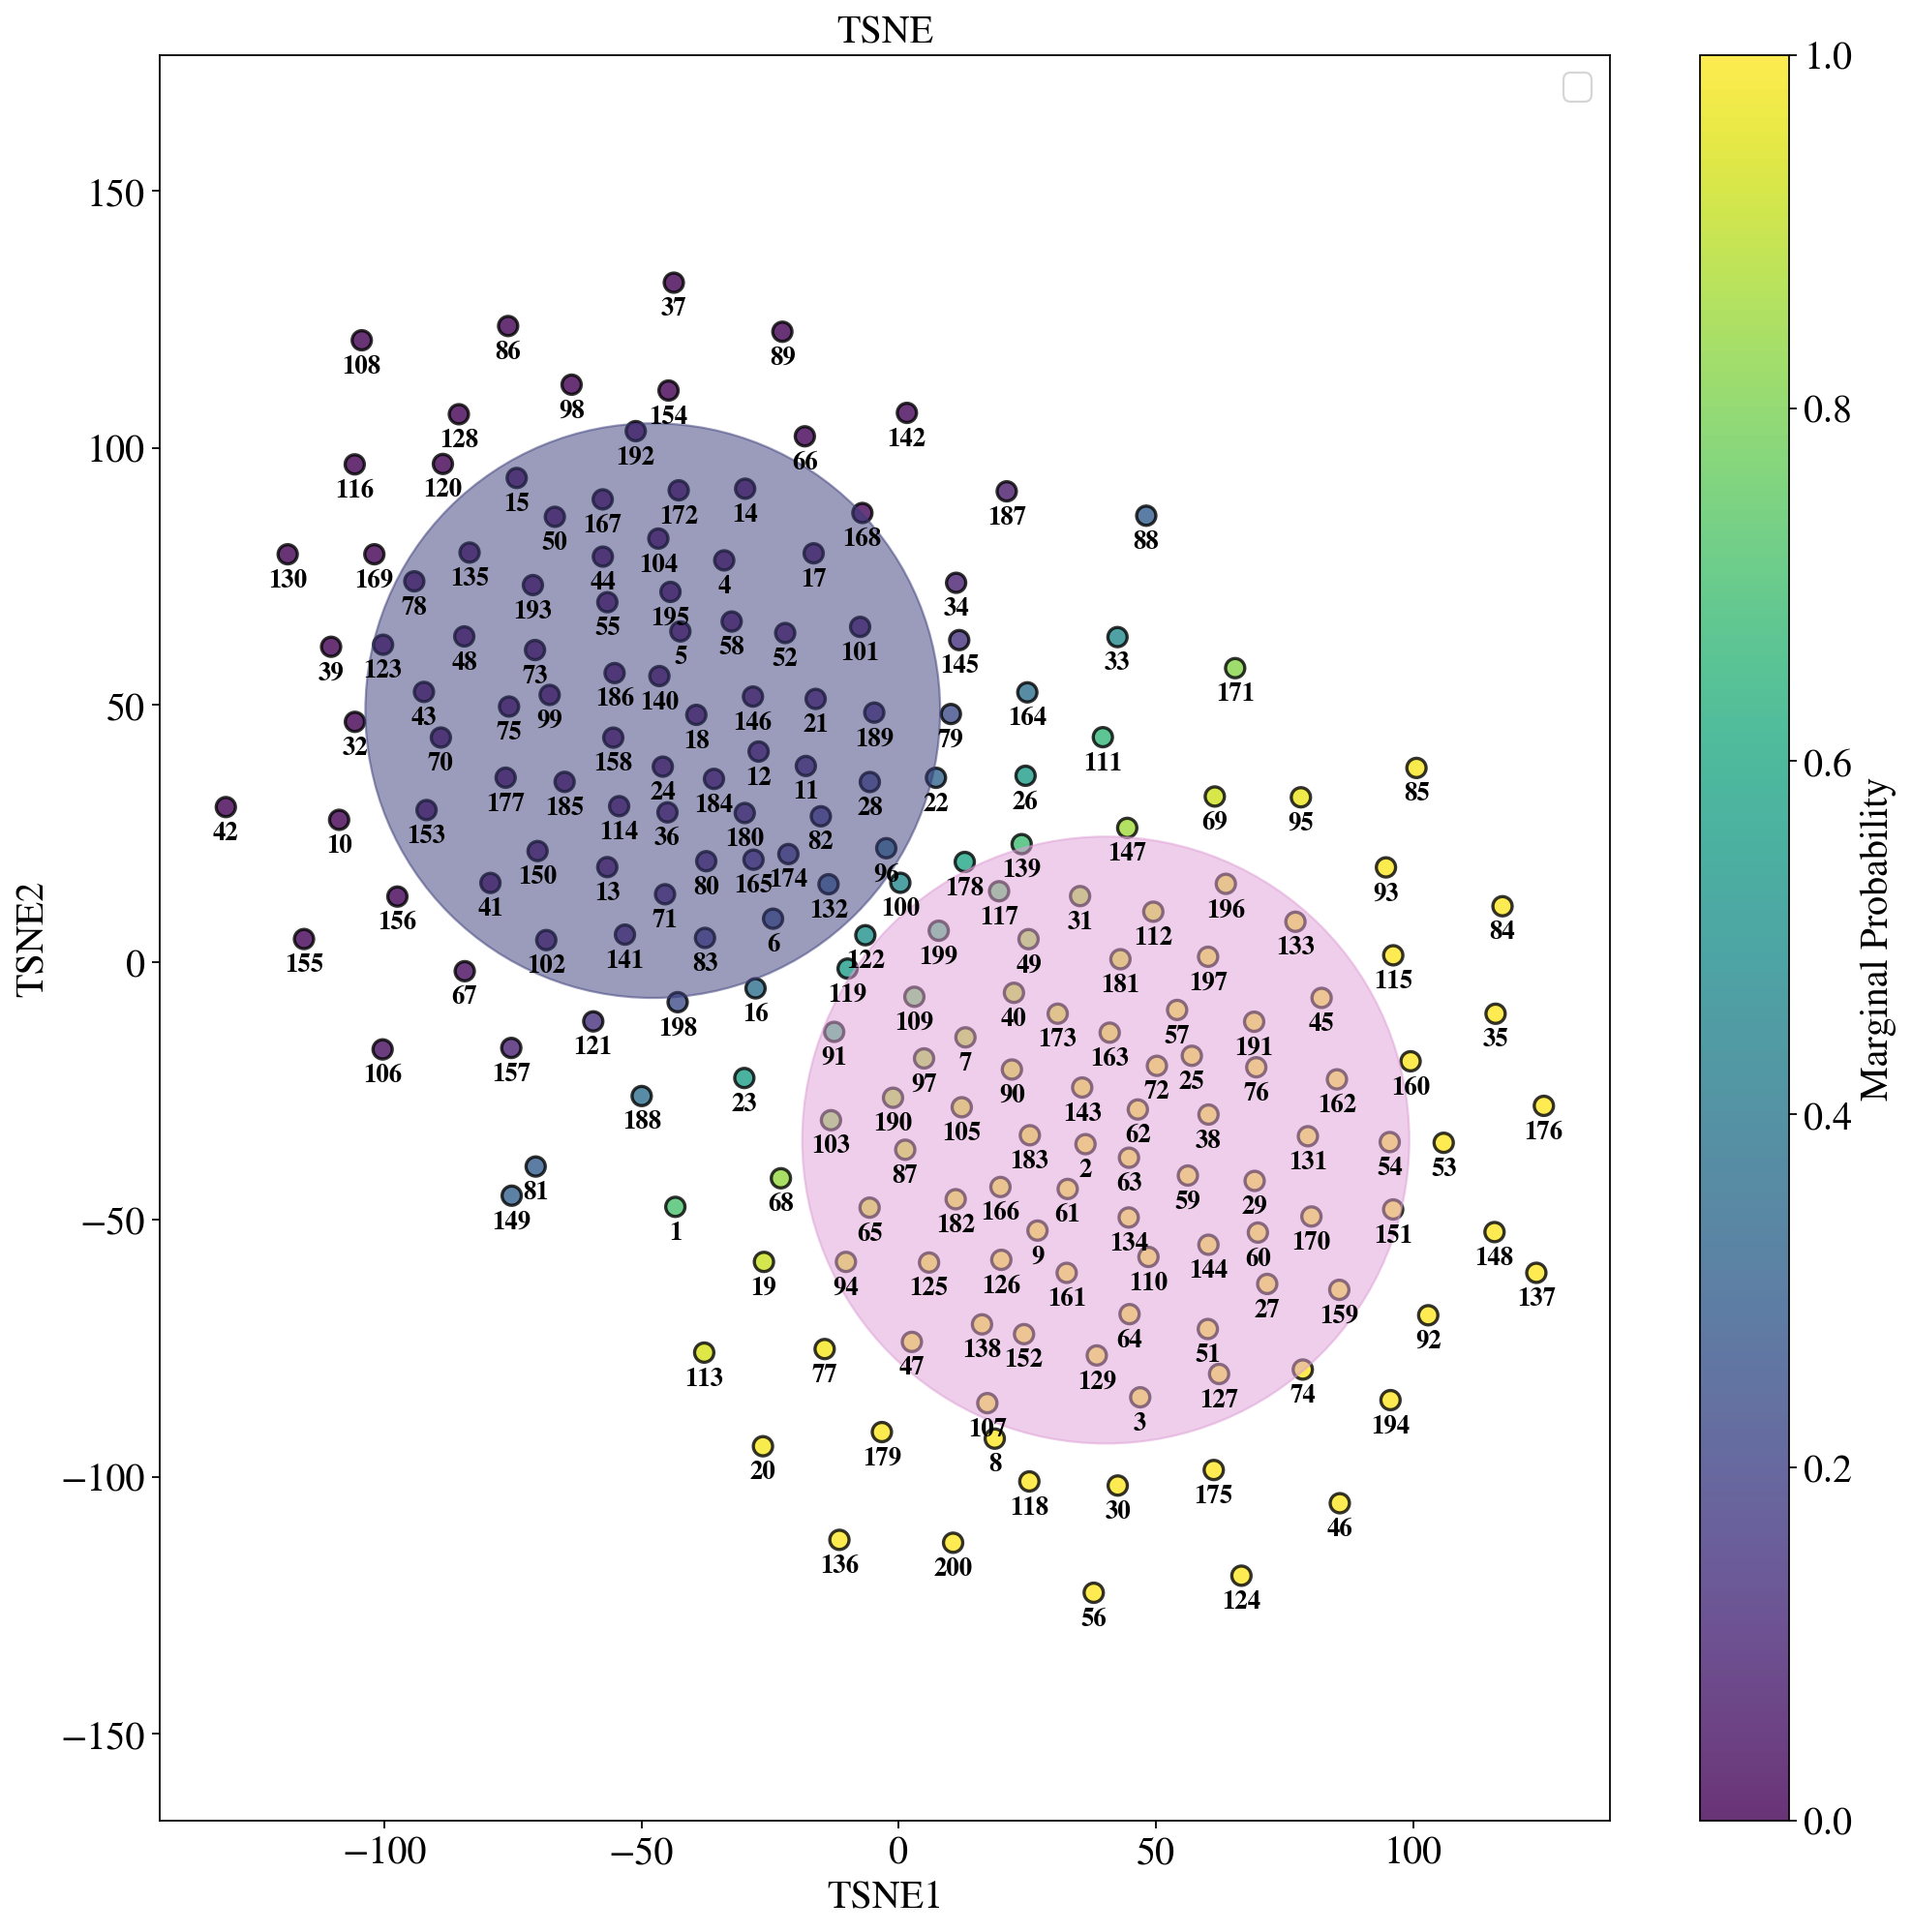

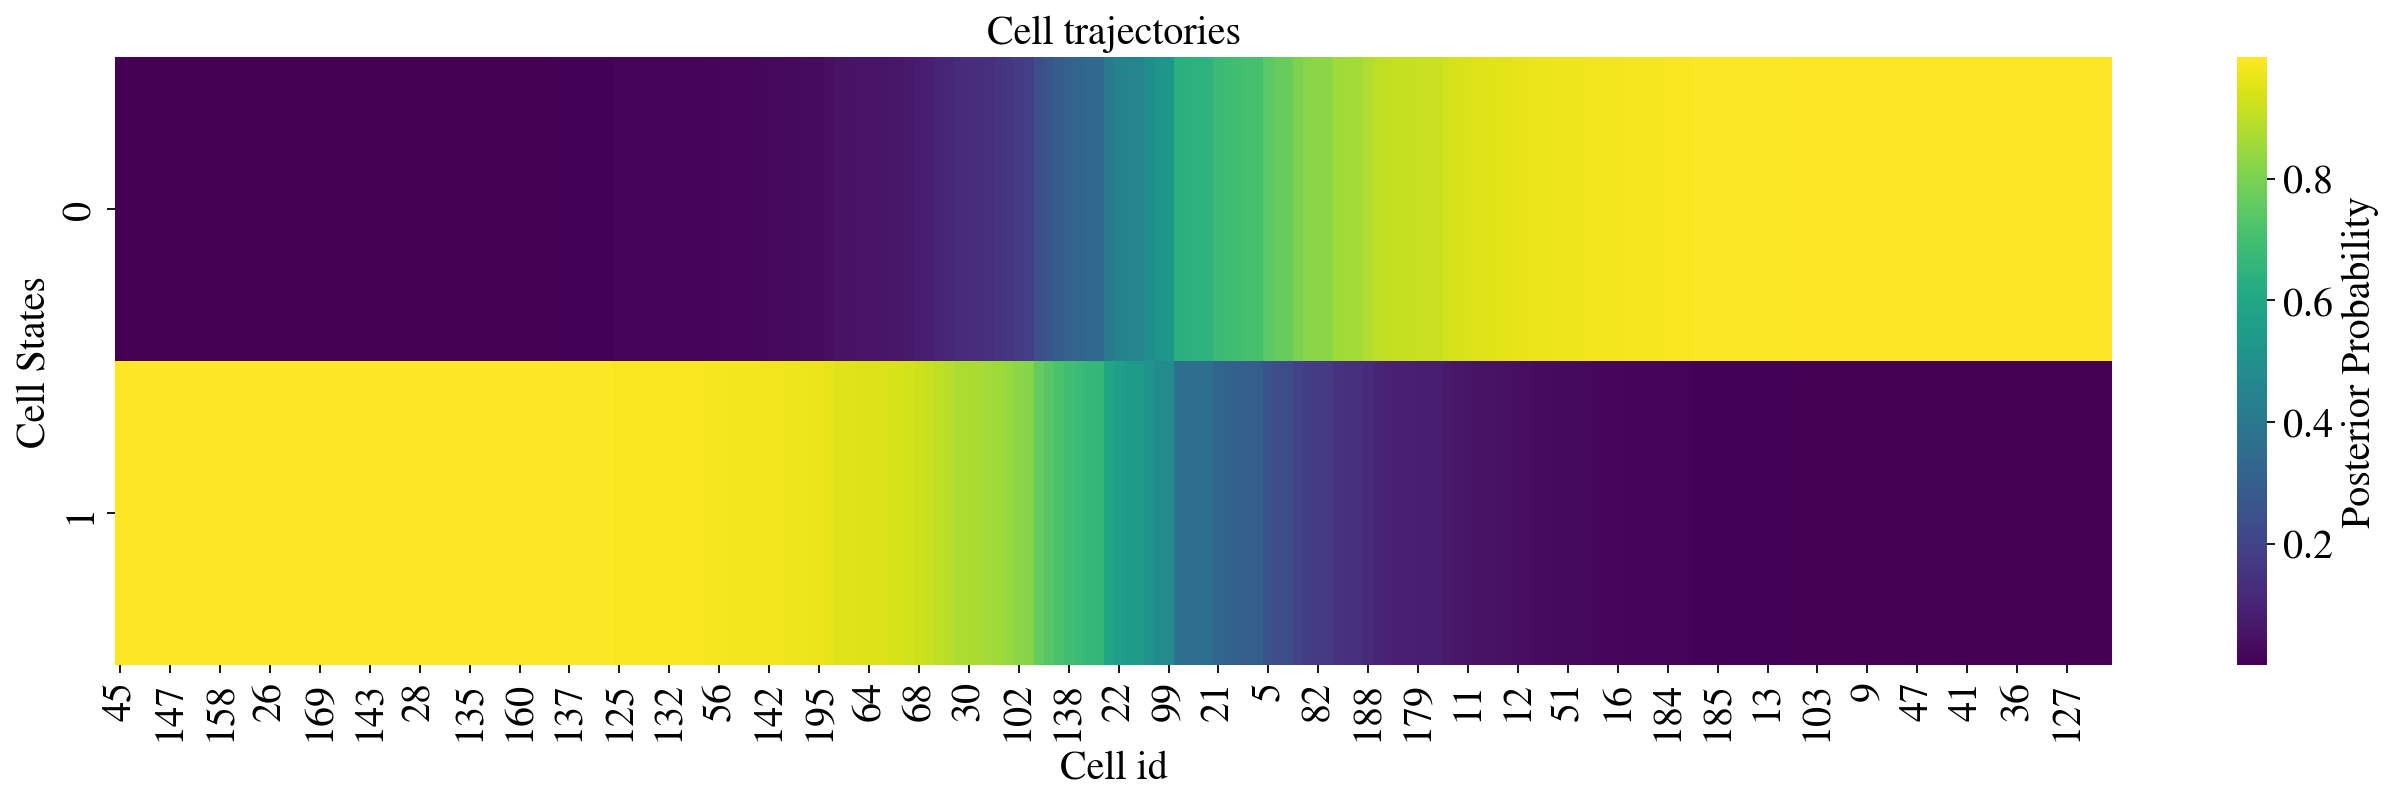

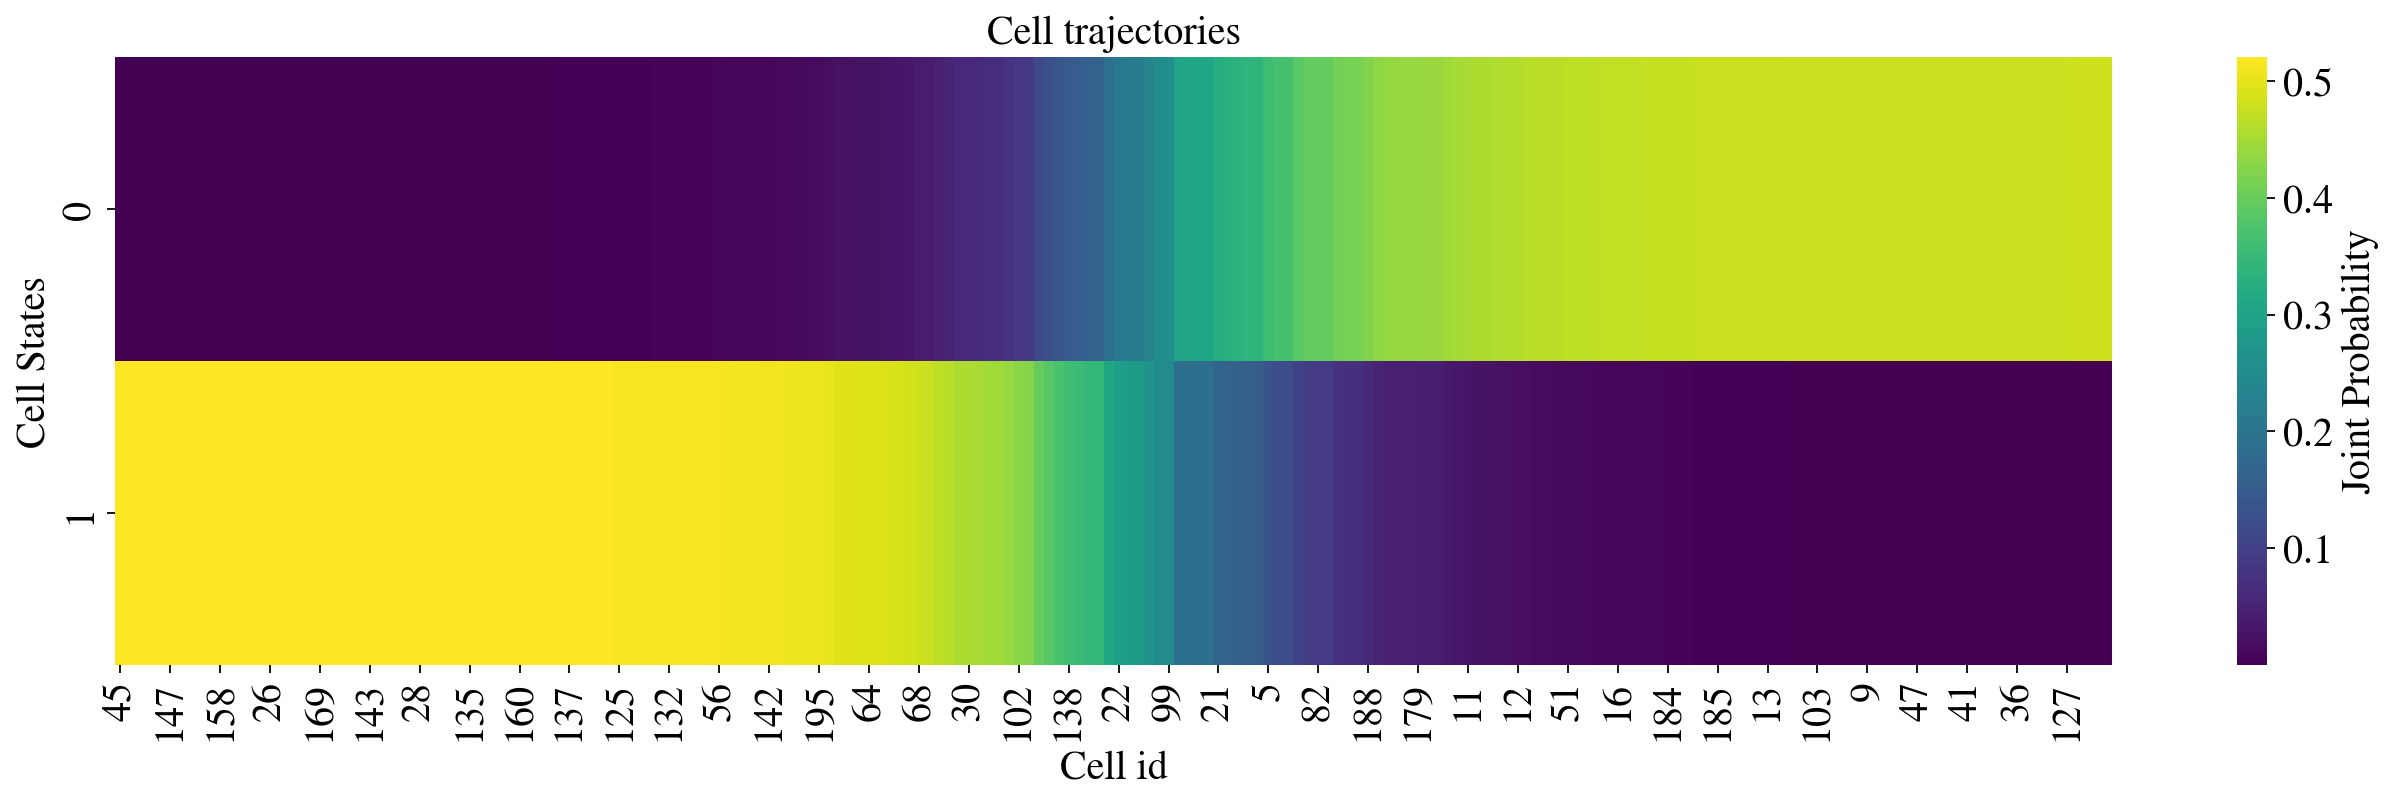

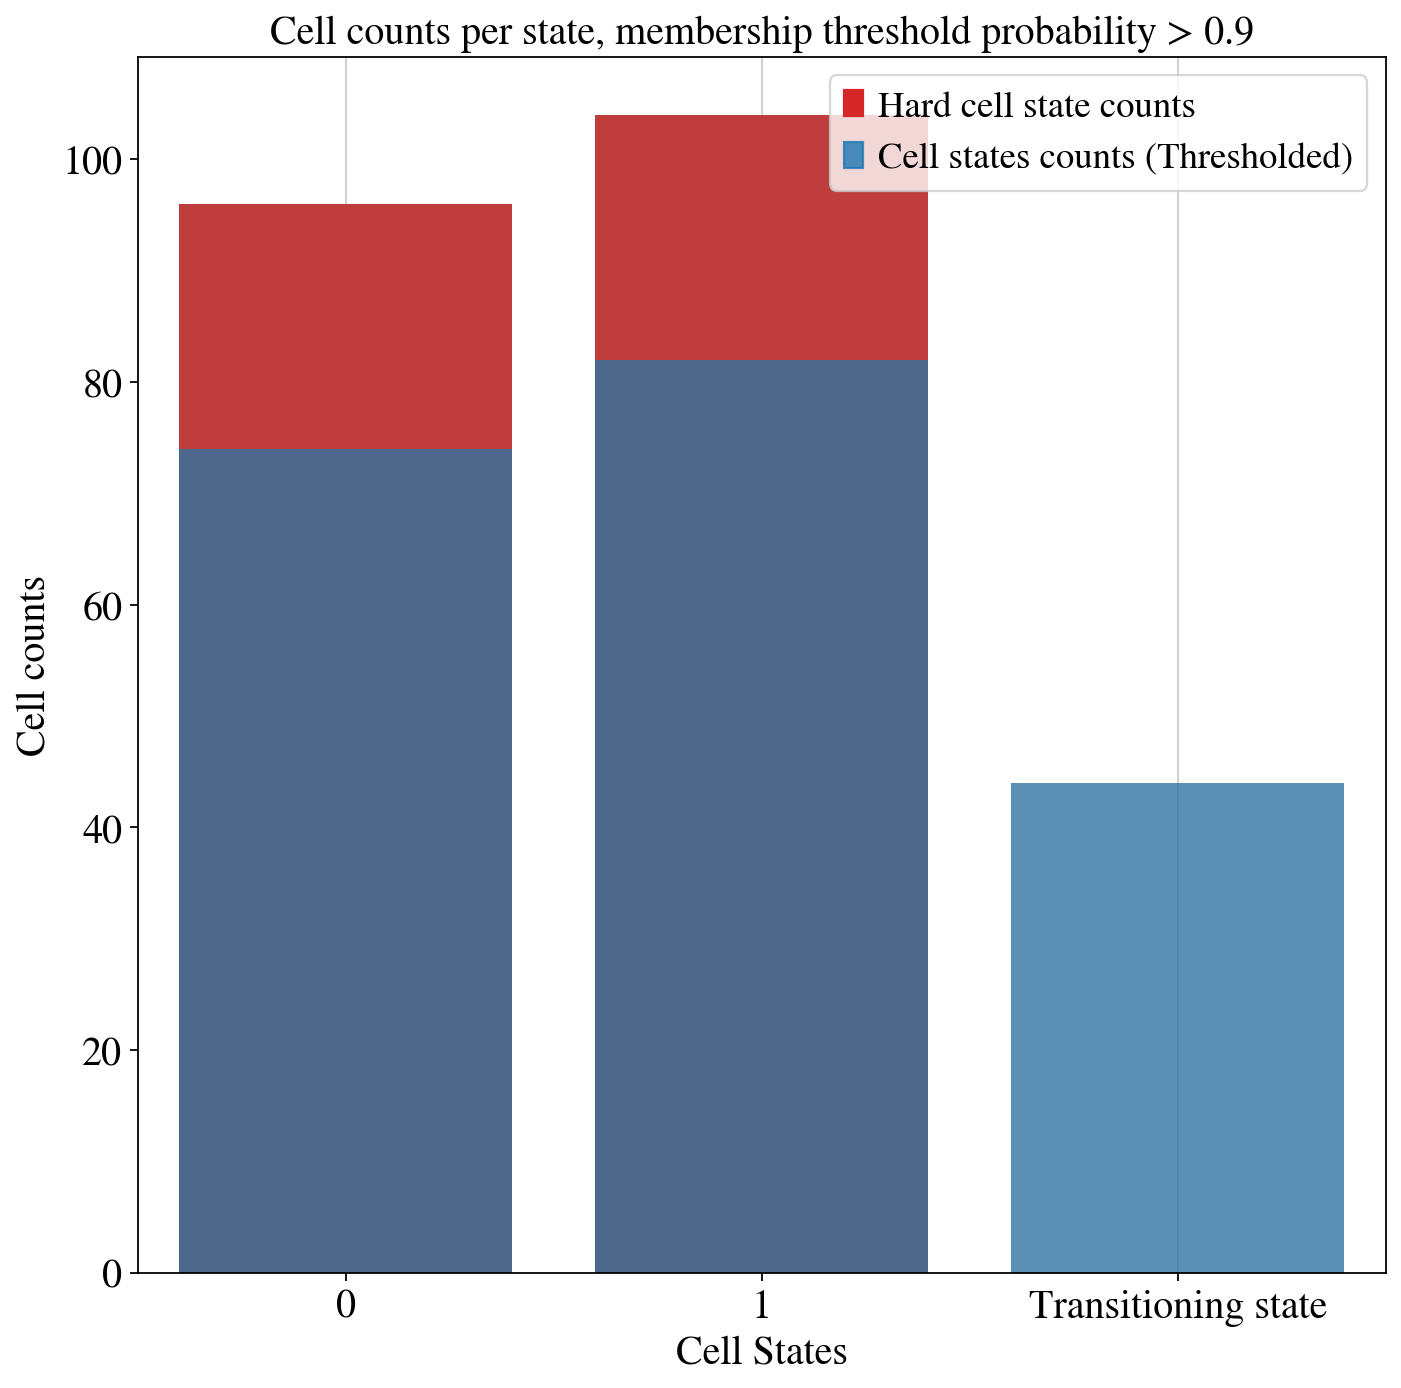

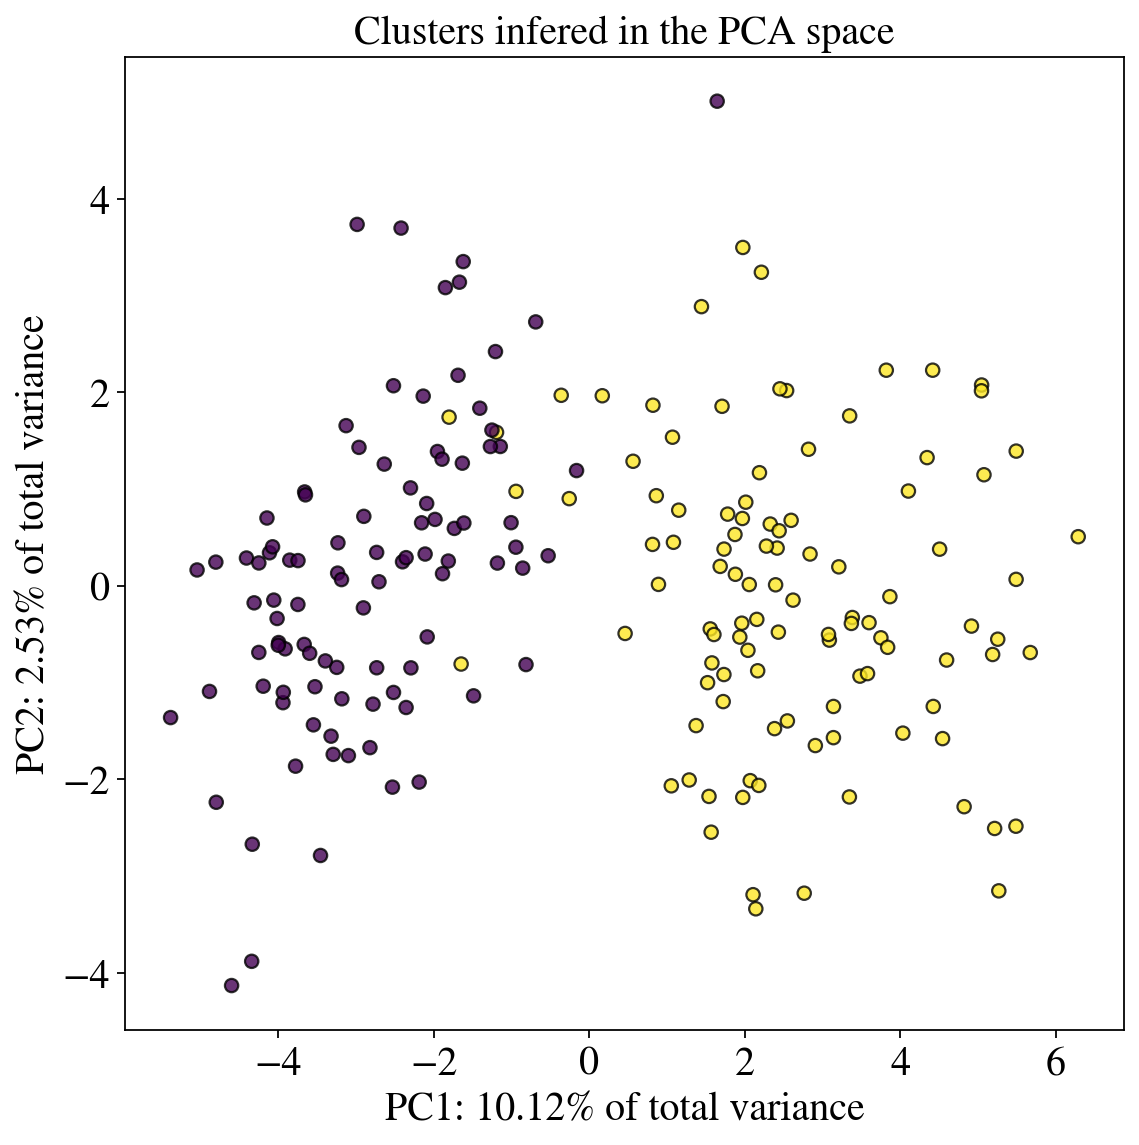

In [5]:
adata = sc.read_csv("datasets/dataset4.csv")
pipeline = scgmix(adata,method="TSNE",rand_seed=42)
pipeline.preprocess(mads_away=5,feature_selection=False)
pipeline.dimreduction(plot_result=True, pc_selection_method="variance",n_pcs=180,variance_threshold=90)
study = pipeline.mix(n_trials=100,max_num_components=15,enable_preclustering=True,preclustering_method="spectral",criterion = "BIC",max_iter=1000,show_progress_bar=False)
labels, posteriorprob, jointprob, marginalprob = pipeline.visualize(membership_threshold=0.90,cmap="viridis")

# Dataset 5


kaiser selected 30 principal components out of 150


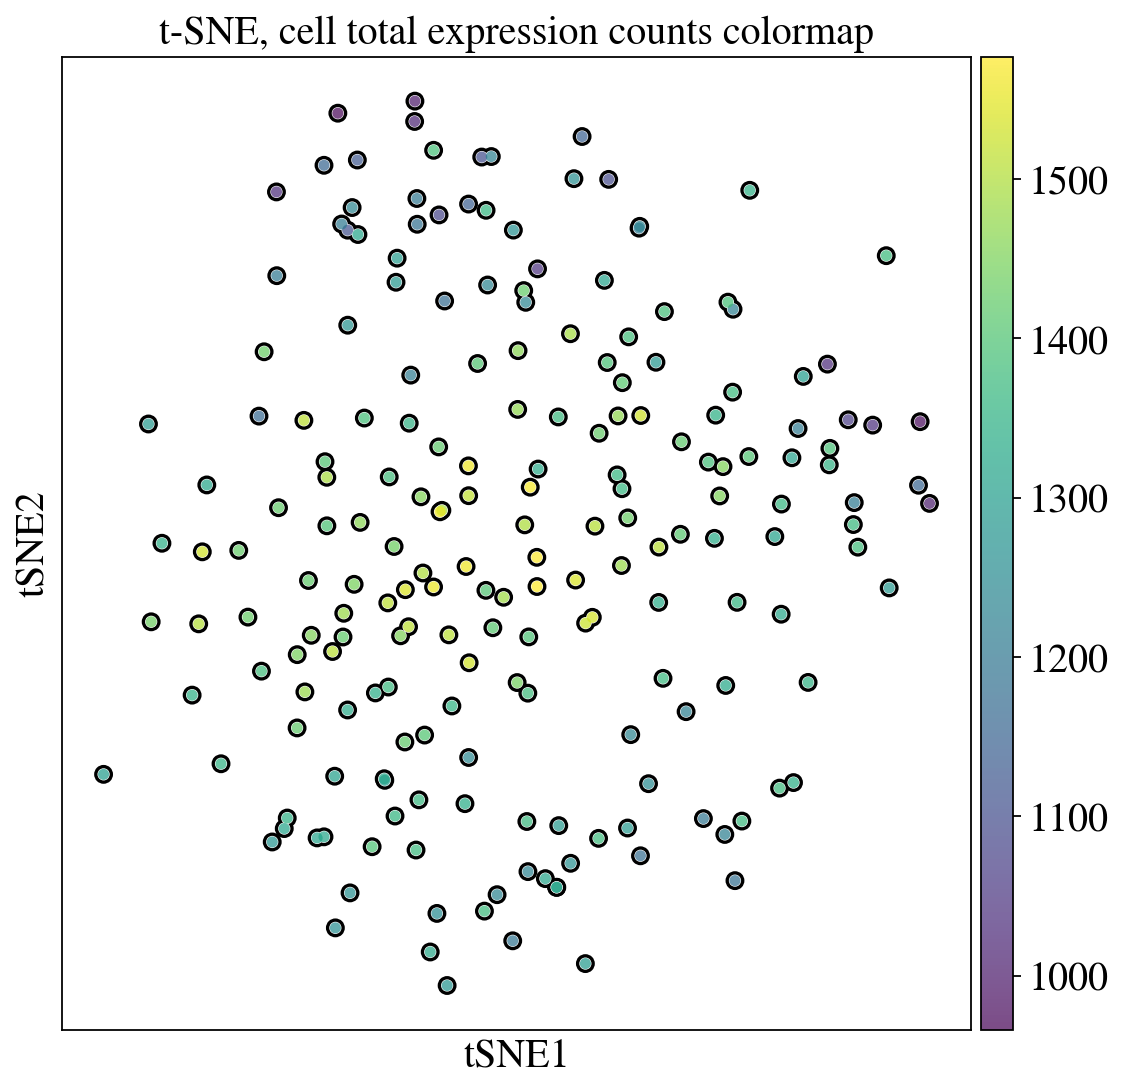

Gaussian Mixture model with BIC = 2157.6112354391576
GaussianMixture(covariance_type='tied', max_iter=1000, n_components=2,
                random_state=16)


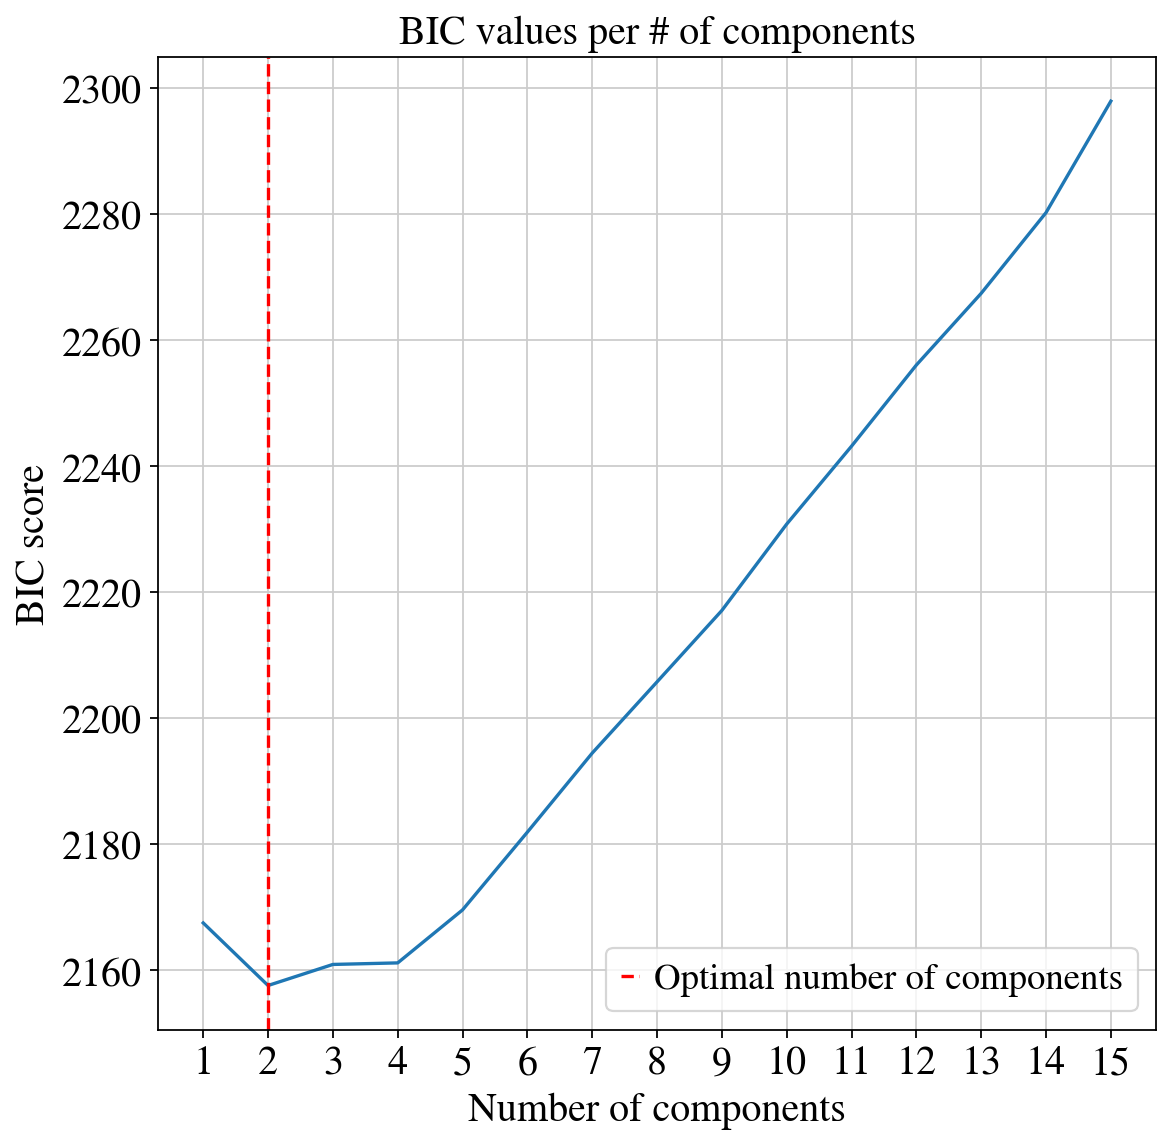

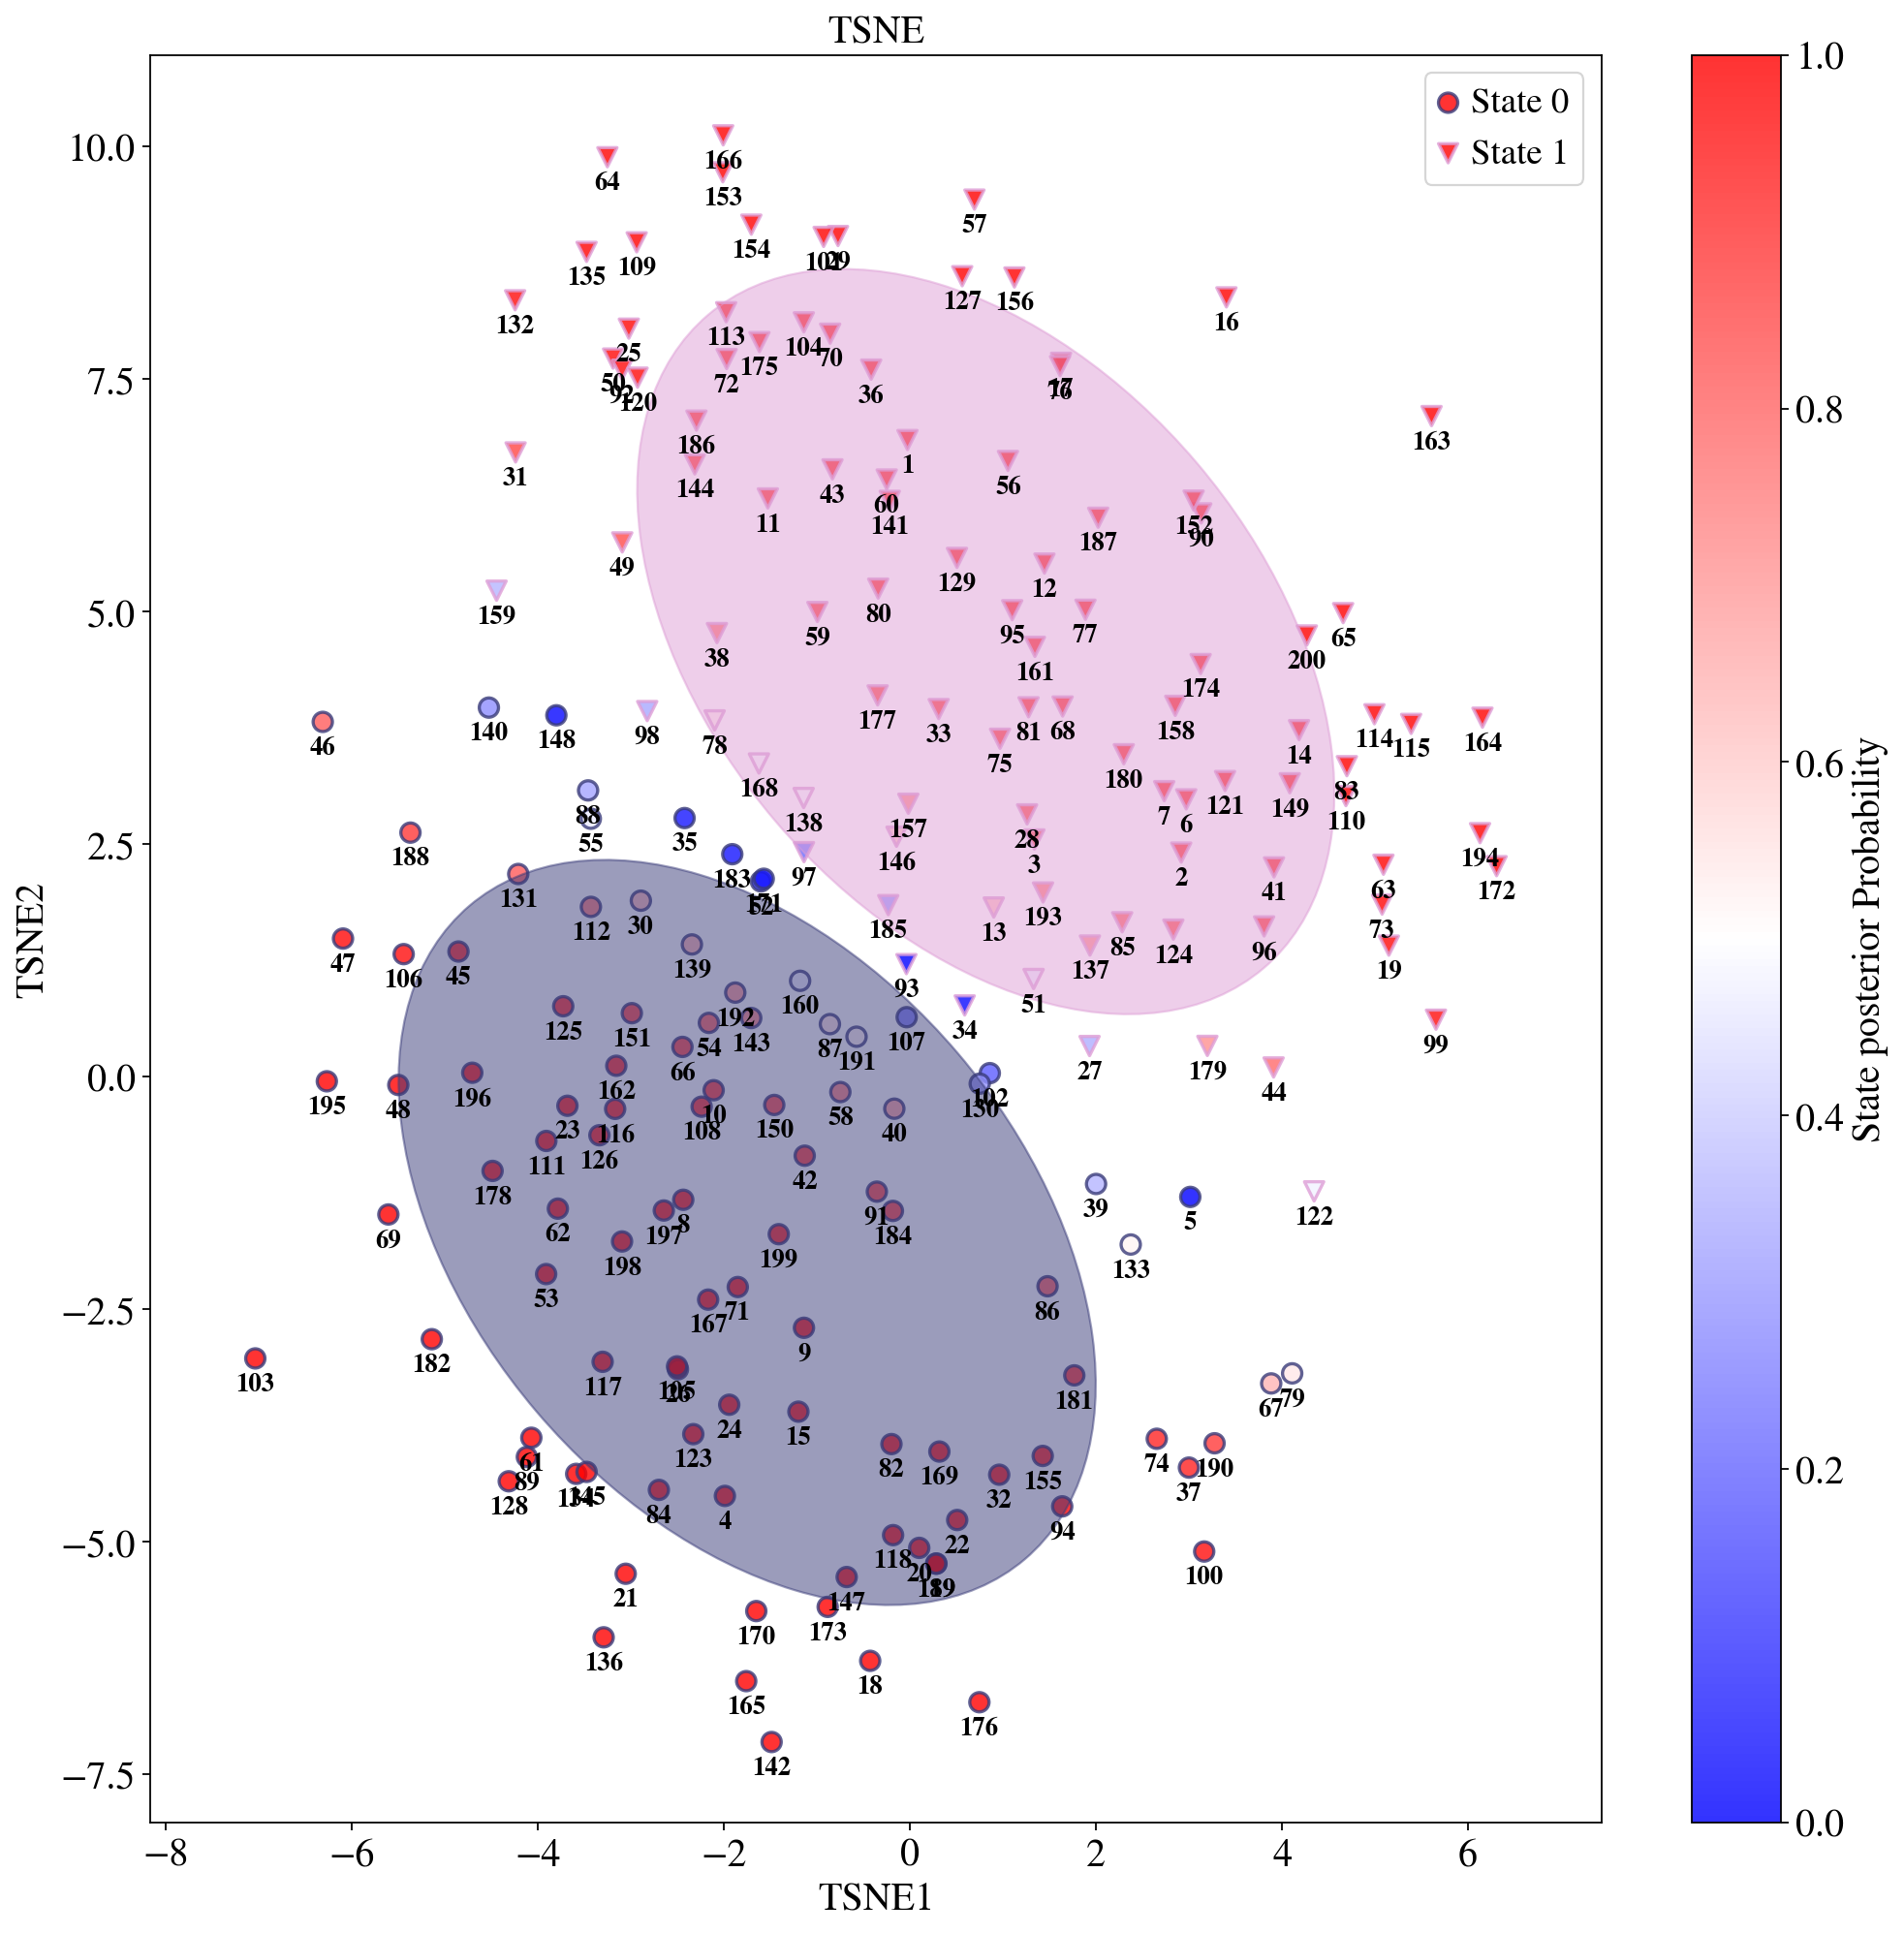

No handles with labels found to put in legend.


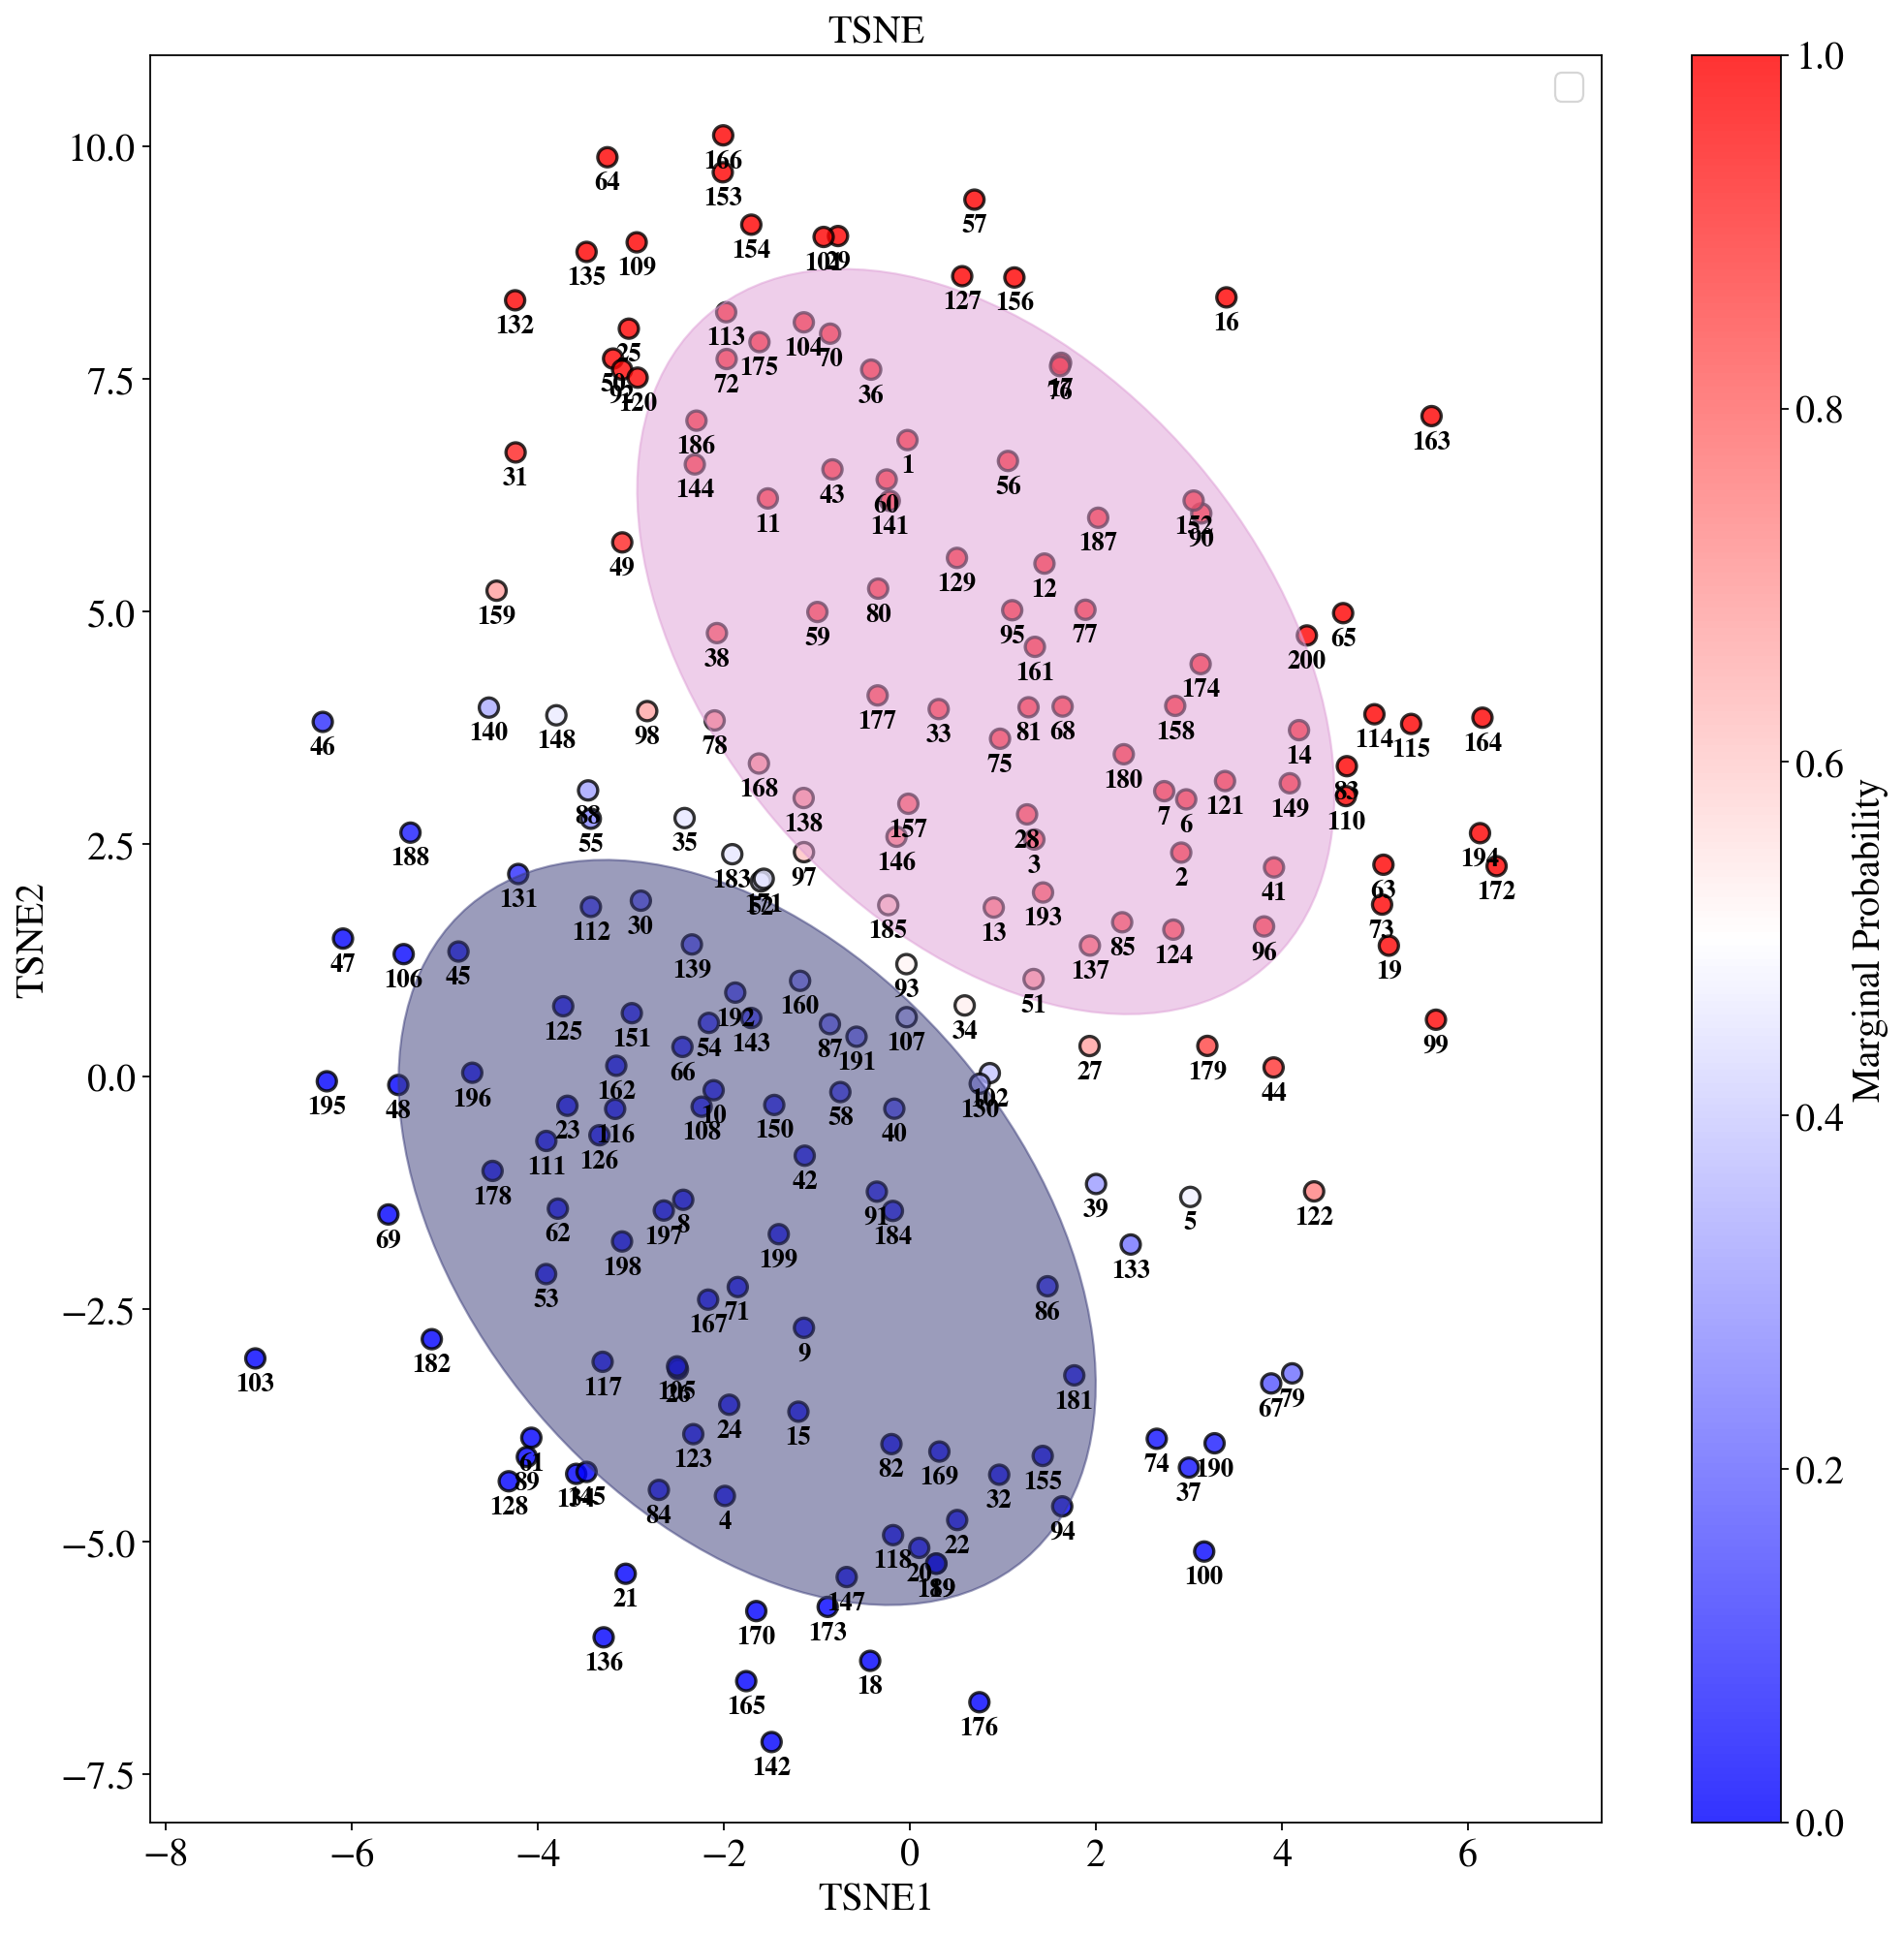

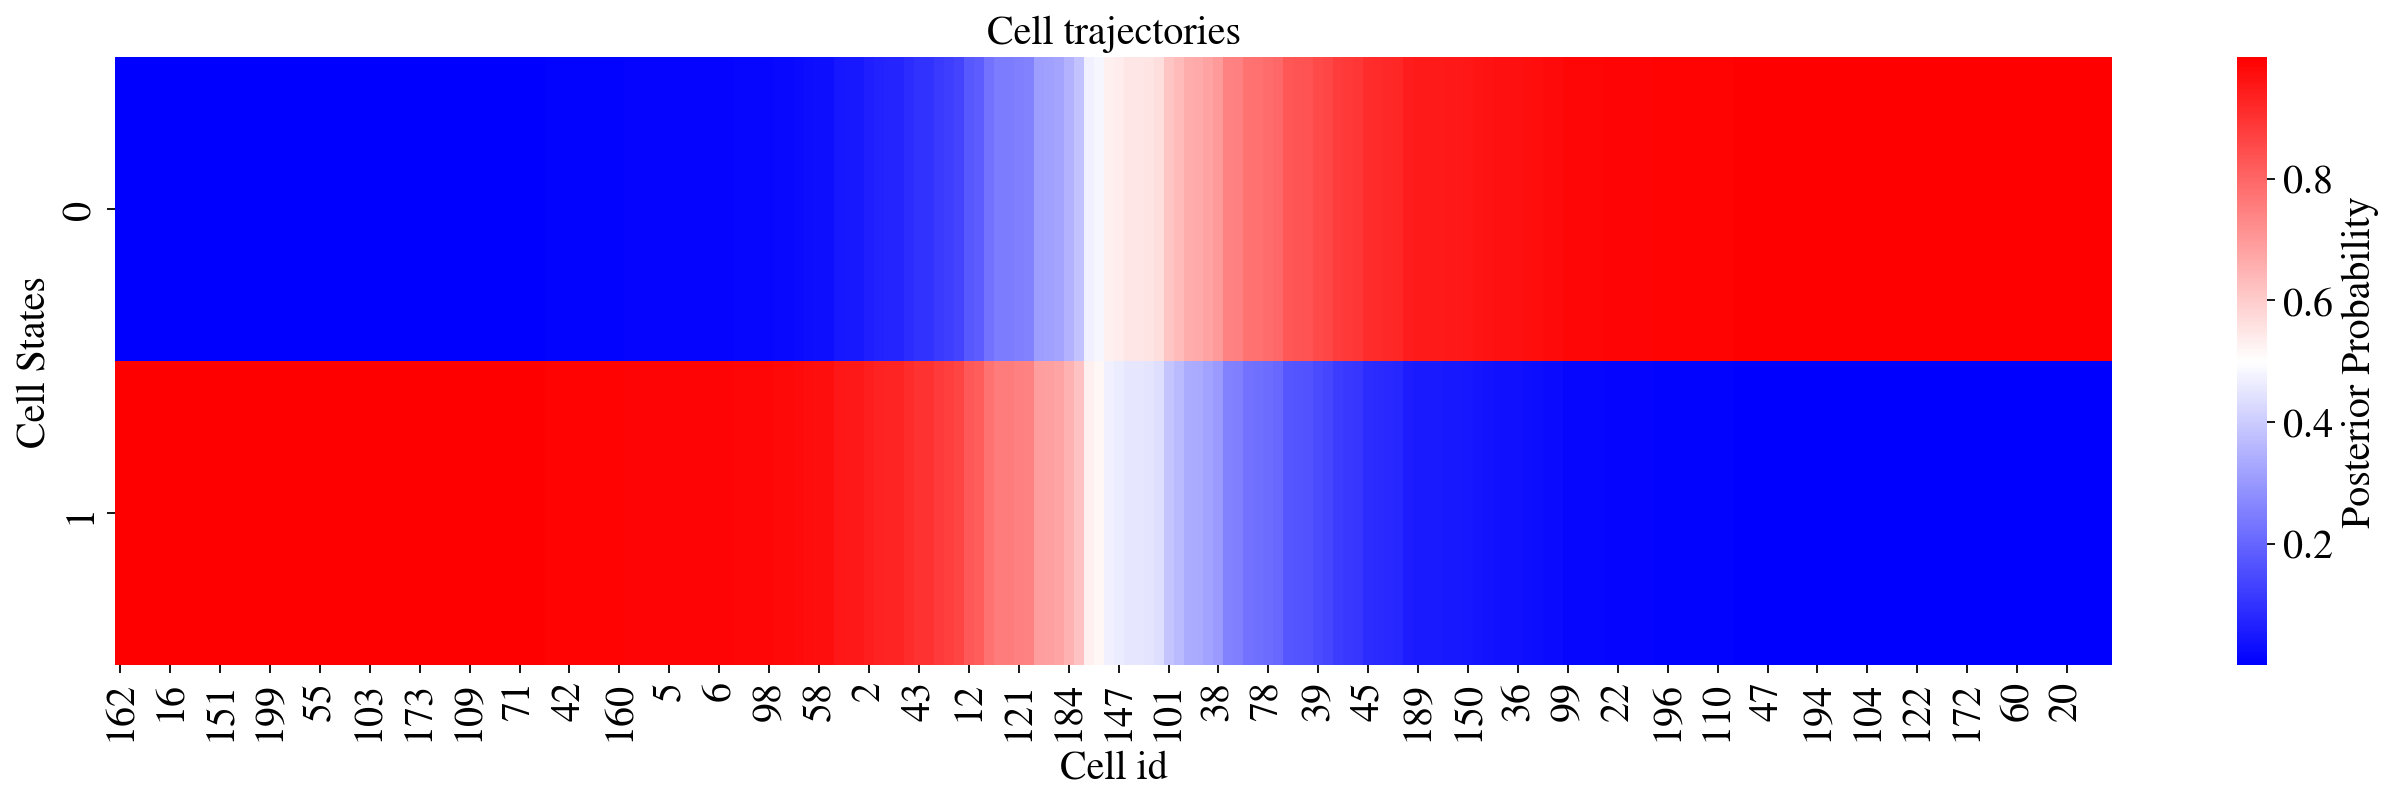

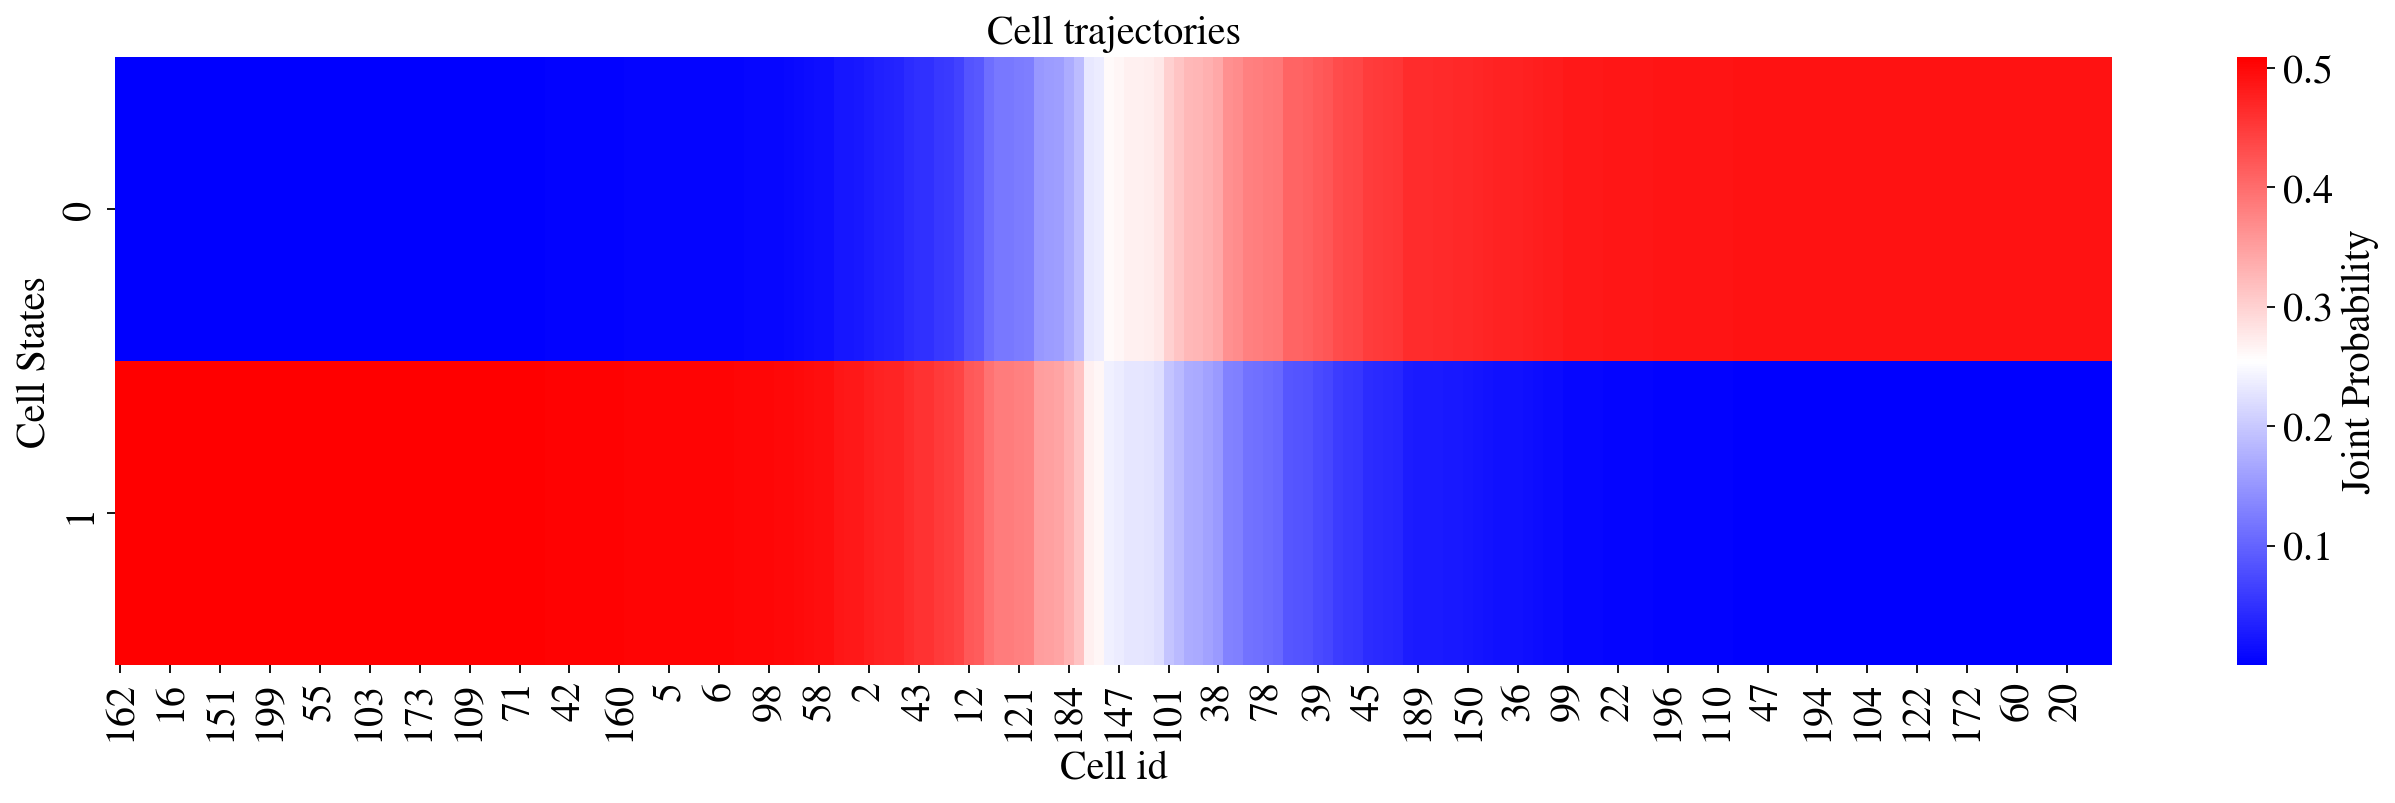

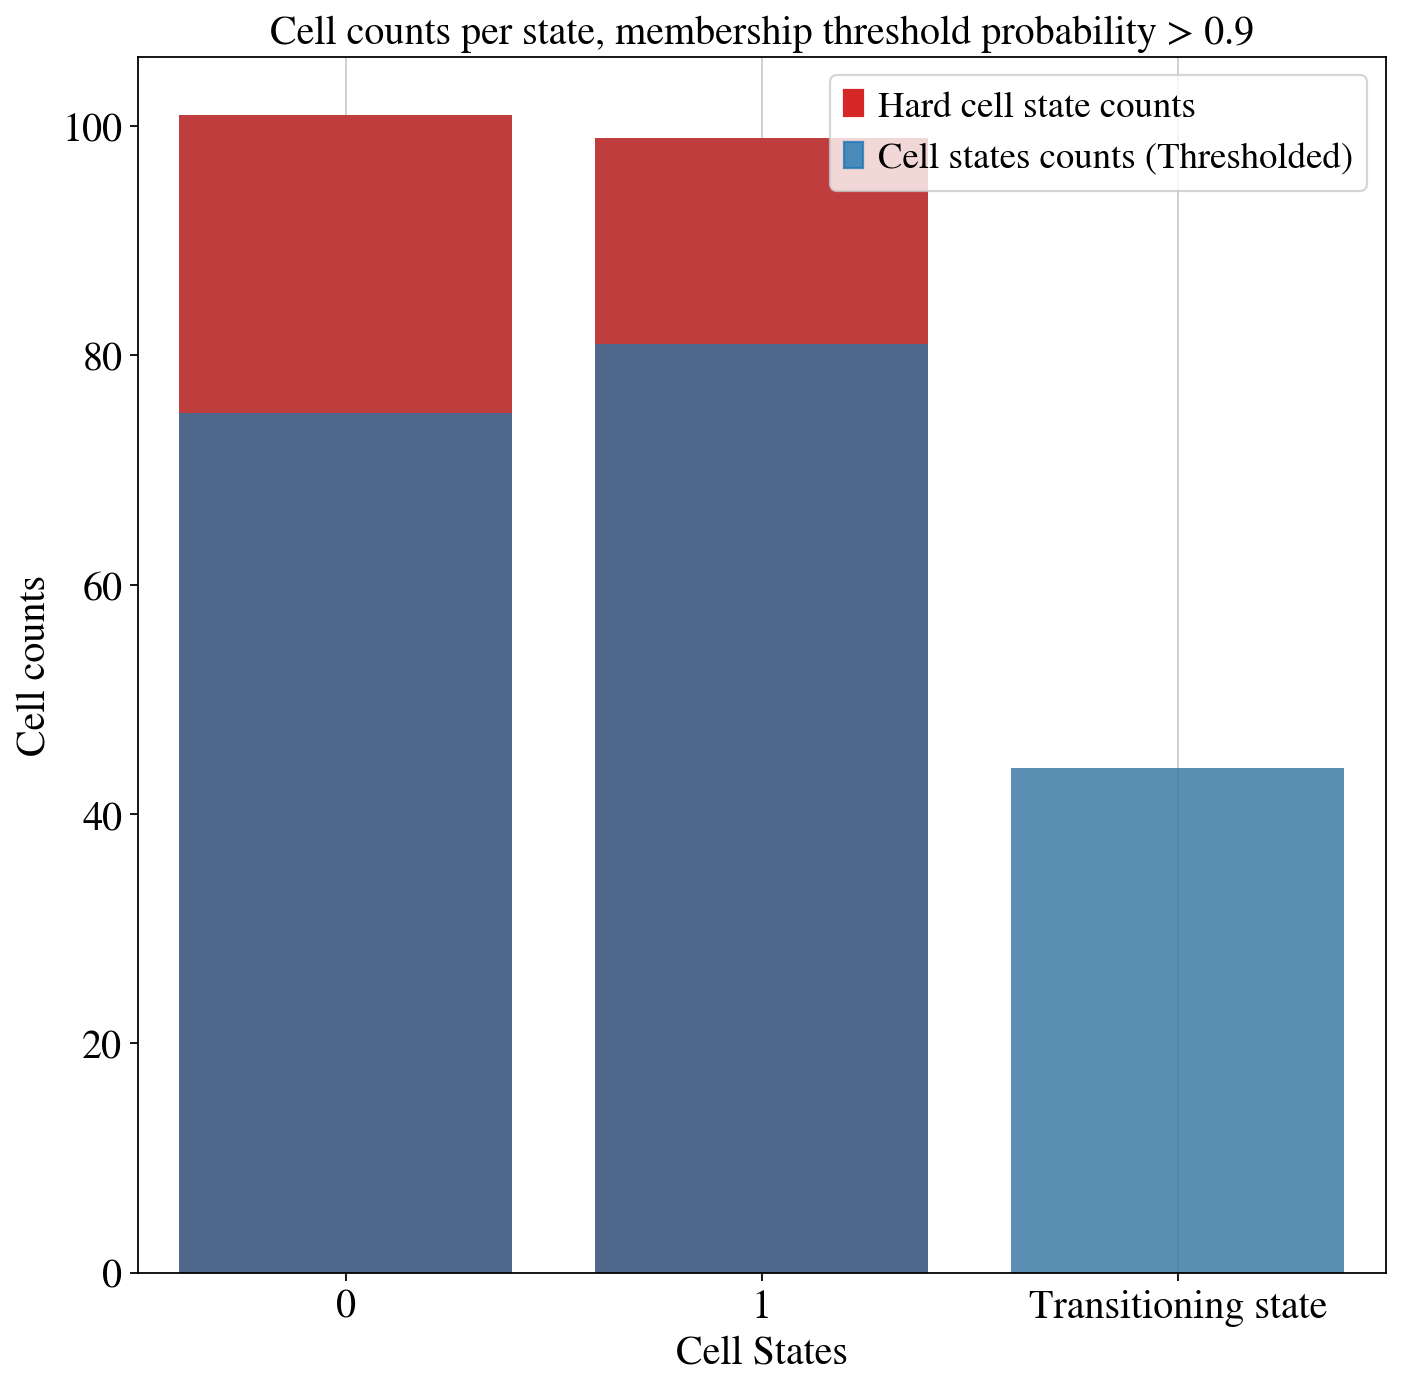

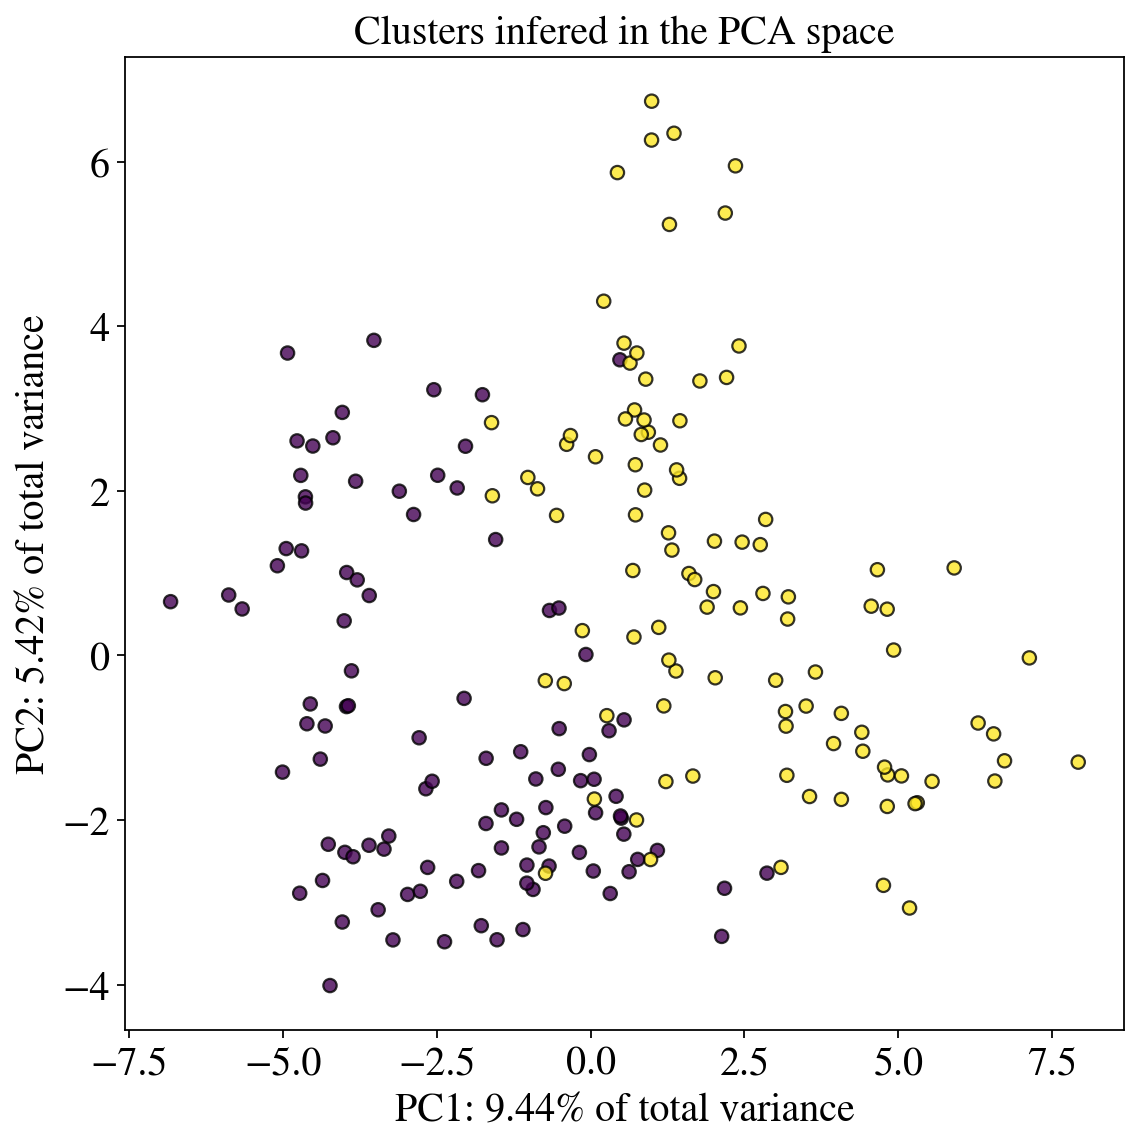

ValueError: too many values to unpack (expected 2)

In [6]:
adata = sc.read_csv("datasets/dataset5.csv")
pipeline = scgmix(adata,method="PCA",rand_seed=42) # Creating an instance of Preprocess class
pipeline.preprocess(mads_away=5,feature_selection=False)
pipeline.dimreduction(plot_result=True, pc_selection_method="kaiser",n_pcs=150)
study = pipeline.mix(n_trials=100,max_num_components=15,enable_preclustering=False,criterion = "BIC",max_iter=1000,show_progress_bar=False)
labels, posteriors = pipeline.visualize(membership_threshold=0.90)